# Extract Data

## Import Library

In [283]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import sqlite3
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
from openai import OpenAI
from dotenv import load_dotenv
import re
import json
import google.cloud.storage
from datetime import datetime

## 1. Project Data CSV

In [284]:
df_project_data = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/projects_data.csv")
print("Project Data")
df_project_data

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\1435975100.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_project_data = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/projects_data.csv")


Project Data


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Population Data CSV

In [285]:
df_population_csv = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/population_data.csv", header=1, skiprows=[2])
print("Population Data")
df_population_csv

Population Data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


## 3. Population Data JSON

In [286]:
df_population_json = pd.read_json("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/population_data.json")
print("Population Data")
df_population_json

Population Data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 4. Population Data XML

In [287]:
with open("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/population_data.xml", "r") as f:
    xml_data = f.read()

soup = BeautifulSoup(xml_data, "lxml")

data = []
for record in soup.find_all("record"):
    record_data = {}
    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        key = field.get("key")
        record_data[name] = value
        if key:
            record_data[name+"_key"] = key
    data.append(record_data)

df_population_xml = pd.DataFrame(data)

print("Population Data")
print(df_population_xml)

Population Data
      Country or Area Country or Area_key               Item     Item_key  \
0               Aruba                 ABW  Population, total  SP.POP.TOTL   
1               Aruba                 ABW  Population, total  SP.POP.TOTL   
2               Aruba                 ABW  Population, total  SP.POP.TOTL   
3               Aruba                 ABW  Population, total  SP.POP.TOTL   
4               Aruba                 ABW  Population, total  SP.POP.TOTL   
...               ...                 ...                ...          ...   
15307        Zimbabwe                 ZWE  Population, total  SP.POP.TOTL   
15308        Zimbabwe                 ZWE  Population, total  SP.POP.TOTL   
15309        Zimbabwe                 ZWE  Population, total  SP.POP.TOTL   
15310        Zimbabwe                 ZWE  Population, total  SP.POP.TOTL   
15311        Zimbabwe                 ZWE  Population, total  SP.POP.TOTL   

       Year     Value  
0      1960     54211  
1      1961

## 5. Population Data DB

In [288]:
conn = sqlite3.connect("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/population_data.db")
cursor = conn.cursor()

query = "SELECT * FROM population_data"
cursor.execute(query)

results = cursor.fetchall()
df_population_db = pd.DataFrame(results)

print("Population Data")
print(df_population_db)
conn.close()

Population Data
      0             1    2                  3            4           5   \
0      0         Aruba  ABW  Population, total  SP.POP.TOTL     54211.0   
1      1   Afghanistan  AFG  Population, total  SP.POP.TOTL   8996351.0   
2      2        Angola  AGO  Population, total  SP.POP.TOTL   5643182.0   
3      3       Albania  ALB  Population, total  SP.POP.TOTL   1608800.0   
4      4       Andorra  AND  Population, total  SP.POP.TOTL     13411.0   
..   ...           ...  ...                ...          ...         ...   
259  259        Kosovo  XKX  Population, total  SP.POP.TOTL    947000.0   
260  260   Yemen, Rep.  YEM  Population, total  SP.POP.TOTL   5172135.0   
261  261  South Africa  ZAF  Population, total  SP.POP.TOTL  17456855.0   
262  262        Zambia  ZMB  Population, total  SP.POP.TOTL   3044846.0   
263  263      Zimbabwe  ZWE  Population, total  SP.POP.TOTL   3747369.0   

             6           7           8           9   ...          53  \
0       554

## 6. Data Population API World Bank

In [289]:
url = "https://api.worldbank.org/v2/countries/indicators/SP.POP.TOTL/?format=json&per_page=18000"

response = requests.get(url)

if response.status_code == 200:
    data = json_normalize(response.json()[1])
    df_data_api = pd.DataFrame(data)
    print(df_data_api)
else:
    print("Error:", response.status_code)

      countryiso3code  date        value unit obs_status  decimal  \
0                 AFE  2023          NaN                        0   
1                 AFE  2022  720859132.0                        0   
2                 AFE  2021  702977106.0                        0   
3                 AFE  2020  685112979.0                        0   
4                 AFE  2019  667242986.0                        0   
...               ...   ...          ...  ...        ...      ...   
17019             ZWE  1964    4310332.0                        0   
17020             ZWE  1963    4177931.0                        0   
17021             ZWE  1962    4049778.0                        0   
17022             ZWE  1961    3925952.0                        0   
17023             ZWE  1960    3806310.0                        0   

      indicator.id    indicator.value country.id                country.value  
0      SP.POP.TOTL  Population, total         ZH  Africa Eastern and Southern  
1      SP.P

## 7. Data Rural Population dan Electricity Access

In [290]:
df_rural_population = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/rural_population_percent.csv", header=1, skiprows=[2])
df_rural_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN


In [291]:
df_rural_population = df_rural_population.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Tahun', value_name='Value')
df_rural_population = df_rural_population.sort_values(by=['Country Name', 'Tahun'], ascending=True)
df_rural_population = df_rural_population.reset_index(drop=True)
df_rural_population

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.492
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.195
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.890
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.574
...,...,...,...,...,...,...
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.499
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.624
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.723
15574,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2017,67.793


In [292]:
df_electricity_access = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/electricity_access_percent.csv", header=1, skiprows=[2])
df_electricity_access

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN


In [293]:
df_electricity_access = df_electricity_access.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Tahun', value_name='Value')
df_electricity_access = df_electricity_access.sort_values(by=['Country Name', 'Tahun'], ascending=True)
df_electricity_access = df_electricity_access.reset_index(drop=True)
df_electricity_access

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1961,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1962,NaN
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1963,NaN
4,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1964,NaN
...,...,...,...,...,...,...
15571,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,2014,32.300000
15572,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,2015,33.700000
15573,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,2016,38.145138
15574,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,2017,NaN


In [294]:
df_rural_electricity_percent = pd.merge(df_rural_population, df_electricity_access, on=['Country Name', 'Country Code', 'Tahun'], suffixes=('_rural', '_electricity'))
df_rural_electricity_percent = df_rural_electricity_percent.rename(columns={
    'Indicator Name_rural': 'Rural Indicator Name', 
    'Indicator Code_rural': 'Rural Indicator Code', 
    'Value_rural': 'Rural Population', 
    'Indicator Name_electricity': 'Electricity Indicator Name', 
    'Indicator Code_electricity': 'Electricity Indicator Code', 
    'Value_electricity': 'Electricity Access'})
df_rural_electricity_percent

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.492,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.195,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.890,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.574,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.499,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.300000
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.624,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.700000
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.723,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.145138
15574,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2017,67.793,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN


## 8. Data Mystery CSV

In [295]:
df_mystery = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/mystery.csv",  encoding='utf-16')
df_mystery

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 9. Data GDP CSV

In [296]:
df_gdp = pd.read_csv("D:/Alterra Academy/mini-project/mini-project_ika-purwanti/data_source/gdp_data.csv", header=1, skiprows=[2])
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


# Cleaning Data

In [297]:
def cleaning_data(df):
    # hapus duplikat data
    df = df.drop_duplicates()
    
    # hapus kolom-kolom yang memiliki lebih dari 50% data kosong dari data yang ada
    count_rows = len(df)
    max_data_len = int(count_rows / 2)
    
    df = df.replace('!$!0', np.nan)
    df = df.replace('', np.nan)
    
    # Tentukan kolom yang akan dihapus
    columns_to_drop = []
    for column in df.columns:
        if df[column].isnull().sum() > max_data_len:
            columns_to_drop.append(column)        
    
    df = df.drop(columns=columns_to_drop)
    
    return df


## 1. Project Data CSV

In [298]:
df_project_data = cleaning_data(df_project_data)
df_project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P162228?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P163962?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167672?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161364?lang=en,Social Protection!$!63!$!SA,Other Industry; Trade and Services!$!25!$!YZ,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro!$!100!$!PH,NaN,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037362/post-war...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037452/post-war...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN


## 2. Population Data CSV

In [299]:
df_population_csv = cleaning_data(df_population_csv)
df_population_csv = df_population_csv[df_population_csv['Country Name'] != 'Not classified']

# Reset index
df_population_csv = df_population_csv.reset_index(drop=True)

df_population_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 3. Population Data JSON

In [300]:
df_population_json = cleaning_data(df_population_json)
df_population_json = df_population_json[df_population_json['Country Name'] != 'Not classified']

# Reset index
df_population_json = df_population_json.reset_index(drop=True)

df_population_json

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 4. Population Data XML

In [301]:
df_population_xml = cleaning_data(df_population_xml)
df_population_xml = df_population_xml[df_population_xml['Country or Area'] != 'Not classified']

# Reset index
df_population_xml = df_population_xml.reset_index(drop=True)
df_population_xml

,Country or Area,Country or Area_key,Item,Item_key,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15249,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15250,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15251,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15252,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


## 5. Population Data DB

In [302]:
df_population_db = cleaning_data(df_population_db)
df_population_db = df_population_db[df_population_db[1] != 'Not classified']

# Reset index
df_population_db = df_population_db.reset_index(drop=True)
df_population_db

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 6. Data Population API World Bank

In [303]:
df_data_api = cleaning_data(df_data_api)
df_data_api = df_data_api[df_data_api["country.value"] != 'Not classified']
df_data_api = df_data_api[df_data_api["date"] != "2023"]

# Reset index
df_data_api = df_data_api.reset_index(drop=True)
df_data_api

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\342596533.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


,countryiso3code,date,value,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2022,720859132.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2021,702977106.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2020,685112979.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2019,667242986.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2018,649757148.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...
16690,ZWE,1964,4310332.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16691,ZWE,1963,4177931.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16692,ZWE,1962,4049778.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16693,ZWE,1961,3925952.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe


## 7. Data Rural Population dan Electricity Access

In [304]:
# menghapus baris data
df_rural_electricity_percent = df_rural_electricity_percent[df_rural_electricity_percent["Country Name"] != 'Not classified']
df_rural_electricity_percent = df_rural_electricity_percent[df_rural_electricity_percent['Tahun'] != 'Unnamed: 62']

df_rural_electricity_percent

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.492,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.195,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.890,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.574,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
...,...,...,...,...,...,...,...,...,...
15570,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2013,67.346,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.076813
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.499,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.300000
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.624,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.700000
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.723,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.145138


## 8. Data Mystery CSV

In [305]:
df_mystery = cleaning_data(df_mystery)
df_mystery = df_mystery[df_mystery["Country Name"] != 'Not classified']
df_mystery

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## 9. Data GDP CSV

In [306]:
# hanya menghapus kolom yang memiliki nilai nan semua
df_gdp = df_gdp.dropna(axis=1, how='all')
df_gdp = df_gdp[df_gdp["Country Name"] != 'Not classified']

# Reset index
df_gdp = df_gdp.reset_index(drop=True)
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
259,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN
260,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
261,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


# Transform Data

## Penyesuaian Kolom

### 1. Population Data XML

In [307]:
transformed_df_population_xml = df_population_xml.pivot(index=["Country or Area", "Country or Area_key", "Item", "Item_key"], columns="Year", values="Value").reset_index()

# Menghilangkan nama kolom 'Year'
transformed_df_population_xml.columns.name = None

# Merubah nama kolom
transformed_df_population_xml = transformed_df_population_xml.rename(columns={'Country or Area': 'Country Name', 'Country or Area_key': 'Country Code', 'Item': 'Indicator Name', 'Item_key': 'Indicator Code'})

# Menampilkan DataFrame hasil perubahan
transformed_df_population_xml.reset_index(drop=True)
transformed_df_population_xml

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351,9166764,9345868,9533954,9731361,9938414,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
1,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
2,Algeria,DZA,"Population, total",SP.POP.TOTL,11124888,11404859,11690153,11985136,12295970,12626952,...,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528,40606052,41318142
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013,20486,21117,21882,22698,23520,...,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688,3702218,3811102,3927051,4046901,4169506,4294682,4422143,4551566,4684777
259,World,WLD,"Population, total",SP.POP.TOTL,3032160395,3073368589,3126509809,3191786428,3257459749,3324545319,...,6766296679,6849569339,6932869743,7014983968,7099557649,7185137526,7271322821,7357559450,7444157356,7530360149
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135,5260501,5351799,5446063,5543339,5643643,...,22356391,22974929,23606779,24252206,24909969,25576322,26246327,26916207,27584213,28250420
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846,3140264,3240587,3345145,3452942,3563407,...,13082517,13456417,13850033,14264756,14699937,15153210,15620974,16100587,16591390,17094130


### 2. Population Data DB

In [308]:
df_population_db

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [309]:
df_population_db = df_population_db.drop(0, axis=1)
df_population_db = df_population_db.rename(columns={1: 'Country Name', 2: 'Country Code', 3: 'Indicator Name', 4: 'Indicator Code'})

# Menghasilkan daftar tahun dari 1960 hingga 2017
tahun = [str(t) for t in range(1960, 2018)]

# Mengubah nama kolom ke-5 dan seterusnya
for i in range(5, len(df_population_db.columns)):
    df_population_db = df_population_db.rename(columns={i: tahun[i-5]})

# Menampilkan dataframe setelah mengubah nama kolom
df_population_db

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


### 3. Population Data API

In [310]:
df_data_api

,countryiso3code,date,value,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2022,720859132.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2021,702977106.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2020,685112979.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2019,667242986.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2018,649757148.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...
16690,ZWE,1964,4310332.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16691,ZWE,1963,4177931.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16692,ZWE,1962,4049778.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
16693,ZWE,1961,3925952.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe


In [311]:
# Menghapus kolom yang tidak diperlukan
df_data_api = df_data_api.drop(['country.id', 'decimal'], axis=1)

# Mengganti nama kolom
df_data_api = df_data_api.rename(columns={'countryiso3code': 'Country Code', 'indicator.id': 'Indicator Code', 'indicator.value': 'Indicator Name', 'country.value': 'Country Name'})
df_data_api

,Country Code,date,value,Indicator Code,Indicator Name,Country Name
0,AFE,2022,720859132.0,SP.POP.TOTL,"Population, total",Africa Eastern and Southern
1,AFE,2021,702977106.0,SP.POP.TOTL,"Population, total",Africa Eastern and Southern
2,AFE,2020,685112979.0,SP.POP.TOTL,"Population, total",Africa Eastern and Southern
3,AFE,2019,667242986.0,SP.POP.TOTL,"Population, total",Africa Eastern and Southern
4,AFE,2018,649757148.0,SP.POP.TOTL,"Population, total",Africa Eastern and Southern
...,...,...,...,...,...,...
16690,ZWE,1964,4310332.0,SP.POP.TOTL,"Population, total",Zimbabwe
16691,ZWE,1963,4177931.0,SP.POP.TOTL,"Population, total",Zimbabwe
16692,ZWE,1962,4049778.0,SP.POP.TOTL,"Population, total",Zimbabwe
16693,ZWE,1961,3925952.0,SP.POP.TOTL,"Population, total",Zimbabwe


In [312]:
df_data_api = df_data_api.rename(columns={'date': 'Tahun', 'value': 'Value'})
df_data_api = df_data_api[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Tahun', 'Value']]
df_data_api = df_data_api.sort_values(by=['Country Name', 'Tahun'], ascending=True )
df_data_api = df_data_api.reset_index(drop=True)
df_data_api

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16690,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16691,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16692,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16693,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


## Imputing Data GDP 

### Visualisasi data sebelum imputing

In [313]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


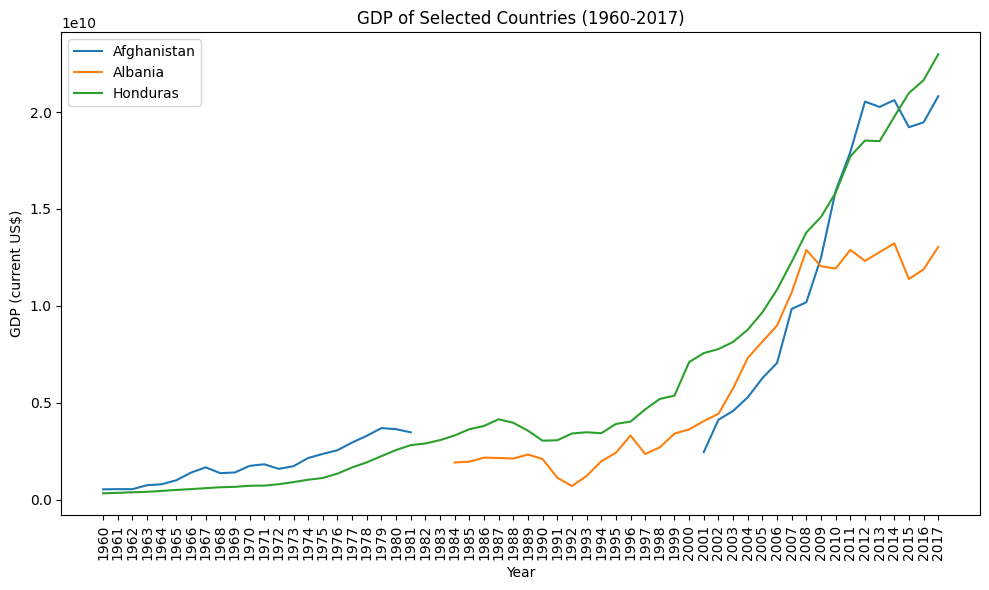

In [314]:
selected_countries = ["Afghanistan", "Albania", "Honduras"]

# Filter data untuk negara yang dipilih
df_selected = df_gdp[df_gdp["Country Name"].isin(selected_countries)]

years = df_selected.columns[4:]
df_selected.loc[:, years] = df_selected[years].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(years, df_selected[df_selected["Country Name"] == country][years].values.flatten(), label=country)

plt.title("GDP of Selected Countries (1960-2017)")
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Menghitung Mean per Country

In [315]:
mean_values = df_gdp.iloc[:, 4:].mean(axis=1)
print(mean_values)

0      2.036355e+09
1      6.620578e+09
2      3.847557e+10
3      6.220172e+09
4      1.501056e+09
           ...     
258    5.101823e+09
259    1.701070e+10
260    1.350855e+11
261    6.663644e+09
262    6.484008e+09
Length: 263, dtype: float64


### Imputing data mean ke data yang kosong

In [316]:
for i, column in enumerate(df_gdp.columns[4:]):
    df_gdp[column].fillna(mean_values, inplace=True)
    
df_gdp

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\3593335705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gdp[column].fillna(mean_values, inplace=True)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
259,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,1.701070e+10
260,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
261,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


### Visualisasi setelah imputing

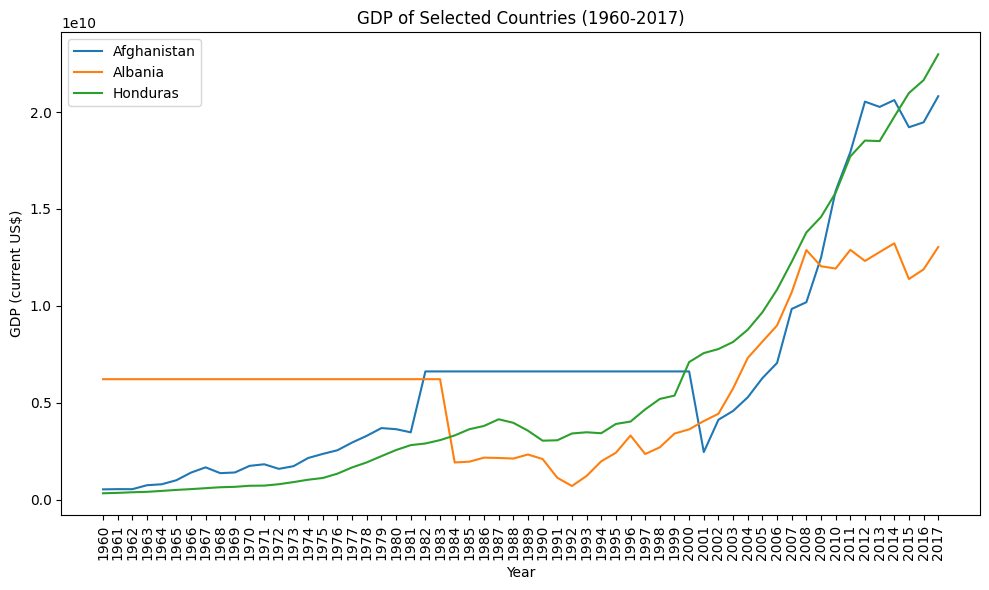

In [317]:
selected_countries = ["Afghanistan", "Albania", "Honduras"]

# Filter data untuk negara yang dipilih
df_selected = df_gdp[df_gdp["Country Name"].isin(selected_countries)]

years = df_selected.columns[4:]
df_selected.loc[:, years] = df_selected[years].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(years, df_selected[df_selected["Country Name"] == country][years].values.flatten(), label=country)

plt.title("GDP of Selected Countries (1960-2017)")
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Ubah Format Table

In [318]:
transformed_df_gdp = df_gdp.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Tahun', value_name='Value')
transformed_df_gdp = transformed_df_gdp.sort_values(by=['Country Name', 'Tahun'], ascending=True)
transformed_df_gdp = transformed_df_gdp.reset_index(drop=True)
transformed_df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08
...,...,...,...,...,...,...
15249,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2013,1.545177e+10
15250,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2014,1.589105e+10
15251,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2015,1.630467e+10
15252,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2016,1.661996e+10


## Penyesuaian Value Data

### 1. Project Data

In [319]:
df_project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P162228?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P163962?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167672?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161364?lang=en,Social Protection!$!63!$!SA,Other Industry; Trade and Services!$!25!$!YZ,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro!$!100!$!PH,NaN,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037362/post-war...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037452/post-war...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN,NaN


In [320]:
selected_columns = ["countryname", "sector1", "sector2", "sector", "mjsector", "theme1", "theme2"]
selected_data = df_project_data[selected_columns]
selected_data.tail()

,countryname,sector1,sector2,sector,mjsector,theme1,theme2
18243,Republic of Chile;Republic of Chile,(Historic)Hydro!$!100!$!PH,NaN,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,NaN,NaN
18244,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN
18245,Kingdom of Denmark;Kingdom of Denmark,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN
18246,Kingdom of the Netherlands;Kingdom of the Neth...,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN
18247,French Republic;French Republic,(Historic)Economic management!$!100!$!ME,NaN,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,NaN,NaN


In [321]:
# menyesuaikan data kolom country name
country_name_list = df_project_data['countryname'].str.split(';')
df_project_data['countryname'] = country_name_list.str[0]

# mengahpus karakter yang tidak dibutuhkan
columns_remove_character = ["sector1", "sector2", "theme1",  "theme2"]
for column in columns_remove_character:
    # df_project_data[column] = df_project_data[column].apply(lambda x: x.split('!$!')[0])
    df_project_data[column] = df_project_data[column].apply(lambda x: x.split('!$!')[0] if isinstance(x, str) else x)

# menghapus kata berulang 
# Menghapus duplikat dalam kolom "sector"
df_project_data['sector'] = df_project_data['sector'].apply(lambda x: ';'.join(set(x.split(';'))) if isinstance(x, str) else x)

# Menghapus duplikat dalam kolom "mjsector"
df_project_data['mjsector'] = df_project_data['mjsector'].apply(lambda x: ';'.join(set(x.split(';'))) if isinstance(x, str) else x)

# menampilkan hasil penyesuaian value pada kolom
selected_data = df_project_data[selected_columns]
selected_data

,countryname,sector1,sector2,sector,mjsector,theme1,theme2
0,World,NaN,NaN,NaN,NaN,NaN,NaN
1,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
2,People's Republic of Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN
3,Islamic Republic of Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
4,Federal Republic of Nigeria,Social Protection,Other Industry; Trade and Services,Other Agriculture;Other Industry; Trade and Se...,Agriculture;Public Administration;Industry; Tr...,NaN,NaN
...,...,...,...,...,...,...,...
18243,Republic of Chile,(Historic)Hydro,NaN,(Historic)Hydro,(Historic)Electric Power & Other Energy,NaN,NaN
18244,Grand Duchy of Luxembourg,(Historic)Economic management,NaN,(Historic)Economic management,(Historic)Multisector,NaN,NaN
18245,Kingdom of Denmark,(Historic)Economic management,NaN,(Historic)Economic management,(Historic)Multisector,NaN,NaN
18246,Kingdom of the Netherlands,(Historic)Economic management,NaN,(Historic)Economic management,(Historic)Multisector,NaN,NaN


### 2. Data GDP

In [322]:
transformed_df_gdp["Value"].head()

0    5.377778e+08
1    5.488889e+08
2    5.466667e+08
3    7.511112e+08
4    8.000000e+08
Name: Value, dtype: float64

In [323]:
# menyesuaikan value pada kolom dengan data numeric agar menjadi 1 angka dibelakang koma
transformed_df_gdp["Value"] = transformed_df_gdp["Value"].apply(lambda x: '{:.1f}'.format(float(str(x).replace(',', ''))))

transformed_df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,537777811.1
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,548888895.6
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,546666677.8
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,751111191.1
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,800000044.4


### 3. Data Rural Electricity Access

In [324]:
df_rural_electricity_percent

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.492,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.195,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.890,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.574,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
...,...,...,...,...,...,...,...,...,...
15570,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2013,67.346,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.076813
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.499,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.300000
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.624,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.700000
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.723,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.145138


In [325]:
# mengisi nilai kosong dengan 0
df_rural_electricity_percent.fillna(0, inplace=True)

columns = ["Rural Population", "Electricity Access"]
for col in columns:
    df_rural_electricity_percent[col] = df_rural_electricity_percent[col].apply(lambda x: '{:.1f}'.format(float(x)) if isinstance(x, (int, float)) else x)

df_rural_electricity_percent.head()

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.8,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.2,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.9,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0


### 4. Data API

In [326]:
df_data_api

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16690,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16691,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16692,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16693,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


In [327]:
df_data_api["Country Code"].unique()

array(['AFG', 'AFE', 'AFW', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG',
       'ARB', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV',
       'KHM', 'CMR', 'CAN', 'CSS', 'CYM', 'CAF', 'CEB', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'EAR',
       'EAS', 'TEA', 'EAP', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'EMU', 'ECS', 'TEC', 'ECA', 'EUU', 'FRO', 'FJI',
       'FIN', 'FCS', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HPC', nan, 'HND', 'HKG', 'HUN', 'IBD', 'IBT', 'IDB', 'IDX',
       'IDA', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR',
       'XKX', '

In [328]:
# menghapus baris data yang country code nya NaN
df_data_api = df_data_api.dropna(subset=['Country Code'])
df_data_api.reset_index(drop=True, inplace=True)
df_data_api

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16438,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16439,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16440,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16441,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


### 5. Data Population 

#### Cek nilai kosong di setiap source

##### CSV

In [329]:
column_with_nan = df_population_csv.columns[4:]
df_nan = df_population_csv.loc[(df_population_csv[column_with_nan].isna()).any(axis=1)]

# Menampilkan hasil pencarian
df_nan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
124,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
193,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
211,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
222,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


##### JSON

In [330]:
column_with_nan = df_population_json.columns[4:]
df_nan = df_population_json.loc[(df_population_json[column_with_nan].isna()).any(axis=1)]

# Menampilkan hasil pencarian
df_nan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
124,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
193,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
211,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
222,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


##### XML

In [331]:
df_nan = transformed_df_population_xml.loc[(transformed_df_population_xml.isna()).any(axis=1)]

# Menampilkan hasil pencarian
df_nan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
68,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491,1432640,1469645,1508273,1548187,1589179,...,4232636,4310334,4390840,4474690,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618,301336,338296,379891,425235,473554,...,2652340,2818939,2998083,3191051,3395556,3598385,3782450,3935794,4052584,4136528
205,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222,7320807,7291436,7234099,7199077,7164132,7130576,7095383,7058322,7022268
209,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964,34238,34056,33435,34640,36607,37685,38824,39969,41109
258,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688,3702218,3811102,3927051,4046901,4169506,4294682,4422143,4551566,4684777


##### DB

In [332]:
column_with_nan = df_population_db.columns[4:]
df_nan = df_population_db.loc[(df_population_db[column_with_nan].isna()).any(axis=1)]

# Menampilkan hasil pencarian
df_nan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,62
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
124,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
193,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
211,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
222,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


##### API

In [333]:
df_nan = df_data_api.loc[(df_data_api.isna()).any(axis=1)]

# Menampilkan hasil pencarian
df_nan

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
16128,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1960,NaN
16129,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1961,NaN
16130,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1962,NaN
16131,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1963,NaN
16132,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1964,NaN
16133,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1965,NaN
16134,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1966,NaN
16135,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1967,NaN
16136,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1968,NaN
16137,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1969,NaN


#### Imputation Nilai 0 

In [334]:
# mengisi nilai kosong dengan 0
df_population_csv.fillna(0, inplace=True)
df_population_json.fillna(0, inplace=True)
transformed_df_population_xml.fillna(0, inplace=True)
df_population_db.fillna(0, inplace=True)
df_data_api.fillna(0, inplace=True)

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\2043805132.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_api.fillna(0, inplace=True)


## Penyesuaian Tipe Data

In [335]:
def adjust_numeric_data_types(df, column):
    df[column] = df[column].str.replace(',', '')
    df[column] = pd.to_numeric(df[column])
    
    return df

### 1. Project Data CSV

In [336]:
df_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18248 non-null  object
 1   regionname                18248 non-null  object
 2   countryname               18248 non-null  object
 3   prodline                  18248 non-null  object
 4   lendinginstr              18002 non-null  object
 5   lendinginstrtype          18002 non-null  object
 6   envassesmentcategorycode  12437 non-null  object
 7   supplementprojectflg      18195 non-null  object
 8   productlinetype           18248 non-null  object
 9   projectstatusdisplay      18244 non-null  object
 10  status                    18244 non-null  object
 11  project_name              18248 non-null  object
 12  boardapprovaldate         16744 non-null  object
 13  board_approval_month      16744 non-null  object
 14  closingdate           

In [337]:
# kolom number
columns_to_convert_numeric = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

for column in columns_to_convert_numeric:
    df_project_data = adjust_numeric_data_types(df_project_data, column)
    
# kolom datetime
columns_to_convert_datetime = ["boardapprovaldate", "closingdate"]
for column in columns_to_convert_datetime:
    df_project_data[column] = pd.to_datetime(df_project_data[column])

# kolom object - string 
columns_to_convert_string = ["sector1", "sector2", "theme1", "theme2"]
for column in columns_to_convert_string:
    df_project_data[column] = df_project_data[column].astype(str)
        
df_project_data_review = df_project_data[["boardapprovaldate", "closingdate", "lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt", "sector1", "sector2", "theme1", "theme2"]]
df_project_data_review

,boardapprovaldate,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,sector1,sector2,theme1,theme2
0,2018-06-28 00:00:00+00:00,NaT,500000.0,0,0,0,500000,nan,nan,nan,nan
1,2018-06-28 00:00:00+00:00,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,nan,nan,nan,nan
2,2018-06-28 00:00:00+00:00,NaT,50000000.0,0,58330000,58330000,0,nan,nan,nan,nan
3,2018-06-27 00:00:00+00:00,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,nan,nan,nan,nan
4,2018-06-27 00:00:00+00:00,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,Social Protection,Other Industry; Trade and Services,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
18243,1948-03-25 00:00:00+00:00,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,13500000,0,(Historic)Hydro,nan,nan,nan
18244,1947-08-28 00:00:00+00:00,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,12000000,0,(Historic)Economic management,nan,nan,nan
18245,1947-08-22 00:00:00+00:00,1949-03-31 00:00:00+00:00,40000000.0,40000000,0,40000000,0,(Historic)Economic management,nan,nan,nan
18246,1947-08-07 00:00:00+00:00,1948-06-30 00:00:00+00:00,195000000.0,195000000,0,195000000,0,(Historic)Economic management,nan,nan,nan


In [338]:
# info type data setelah diubah 
df_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        18248 non-null  object             
 1   regionname                18248 non-null  object             
 2   countryname               18248 non-null  object             
 3   prodline                  18248 non-null  object             
 4   lendinginstr              18002 non-null  object             
 5   lendinginstrtype          18002 non-null  object             
 6   envassesmentcategorycode  12437 non-null  object             
 7   supplementprojectflg      18195 non-null  object             
 8   productlinetype           18248 non-null  object             
 9   projectstatusdisplay      18244 non-null  object             
 10  status                    18244 non-null  object             
 11  project_name   

### 2. Population Data XML

In [339]:
transformed_df_population_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    263 non-null    object
 1   Country Code    263 non-null    object
 2   Indicator Name  263 non-null    object
 3   Indicator Code  263 non-null    object
 4   1960            263 non-null    object
 5   1961            263 non-null    object
 6   1962            263 non-null    object
 7   1963            263 non-null    object
 8   1964            263 non-null    object
 9   1965            263 non-null    object
 10  1966            263 non-null    object
 11  1967            263 non-null    object
 12  1968            263 non-null    object
 13  1969            263 non-null    object
 14  1970            263 non-null    object
 15  1971            263 non-null    object
 16  1972            263 non-null    object
 17  1973            263 non-null    object
 18  1974      

In [340]:
columns_to_convert_numeric = [str(i) for i in range(1960, 2018)]

# Mengubah data di kolom tahun menjadi tipe data numerik
transformed_df_population_xml[columns_to_convert_numeric] = transformed_df_population_xml[columns_to_convert_numeric].astype(float)

# Menampilkan dataframe setelah mengubah ke tipe data numerik
transformed_df_population_xml

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
259,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


In [341]:
transformed_df_population_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    263 non-null    object 
 1   Country Code    263 non-null    object 
 2   Indicator Name  263 non-null    object 
 3   Indicator Code  263 non-null    object 
 4   1960            263 non-null    float64
 5   1961            263 non-null    float64
 6   1962            263 non-null    float64
 7   1963            263 non-null    float64
 8   1964            263 non-null    float64
 9   1965            263 non-null    float64
 10  1966            263 non-null    float64
 11  1967            263 non-null    float64
 12  1968            263 non-null    float64
 13  1969            263 non-null    float64
 14  1970            263 non-null    float64
 15  1971            263 non-null    float64
 16  1972            263 non-null    float64
 17  1973            263 non-null    flo

### 3. Data GDP

In [342]:
transformed_df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15254 entries, 0 to 15253
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    15254 non-null  object
 1   Country Code    15254 non-null  object
 2   Indicator Name  15254 non-null  object
 3   Indicator Code  15254 non-null  object
 4   Tahun           15254 non-null  object
 5   Value           15254 non-null  object
dtypes: object(6)
memory usage: 715.2+ KB


In [343]:
# Mengganti nilai NaN dengan 0 untuk negara negara tertentu yang nilai nya nan semua 
transformed_df_gdp = transformed_df_gdp.replace("nan", 0)

columns_to_convert = ["Tahun", "Value"]
# Mengubah tipe data menjadi numerik
transformed_df_gdp[columns_to_convert] = transformed_df_gdp[columns_to_convert].apply(pd.to_numeric)

transformed_df_gdp.to_csv("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_proccess\gdp_data_clean.csv", index=False)
transformed_df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08
...,...,...,...,...,...,...
15249,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2013,1.545177e+10
15250,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2014,1.589105e+10
15251,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2015,1.630467e+10
15252,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2016,1.661996e+10


In [344]:
transformed_df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15254 entries, 0 to 15253
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    15254 non-null  object 
 1   Country Code    15254 non-null  object 
 2   Indicator Name  15254 non-null  object 
 3   Indicator Code  15254 non-null  object 
 4   Tahun           15254 non-null  int64  
 5   Value           15254 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 715.2+ KB


### 4. Data API

In [345]:
df_data_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16443 non-null  object 
 1   Country Code    16443 non-null  object 
 2   Indicator Name  16443 non-null  object 
 3   Indicator Code  16443 non-null  object 
 4   Tahun           16443 non-null  object 
 5   Value           16443 non-null  float64
dtypes: float64(1), object(5)
memory usage: 770.9+ KB


In [346]:
# Mengubah tipe data menjadi numerik
df_data_api['Tahun'] = df_data_api['Tahun'].apply(pd.to_numeric)
df_data_api

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\4176950777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_api['Tahun'] = df_data_api['Tahun'].apply(pd.to_numeric)


,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16438,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16439,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16440,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16441,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


In [347]:
df_data_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16443 non-null  object 
 1   Country Code    16443 non-null  object 
 2   Indicator Name  16443 non-null  object 
 3   Indicator Code  16443 non-null  object 
 4   Tahun           16443 non-null  int64  
 5   Value           16443 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 770.9+ KB


### 5. Data Rural Electricity

In [348]:
df_rural_electricity_percent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15254 entries, 0 to 15574
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country Name                15254 non-null  object
 1   Country Code                15254 non-null  object
 2   Rural Indicator Name        15254 non-null  object
 3   Rural Indicator Code        15254 non-null  object
 4   Tahun                       15254 non-null  object
 5   Rural Population            15254 non-null  object
 6   Electricity Indicator Name  15254 non-null  object
 7   Electricity Indicator Code  15254 non-null  object
 8   Electricity Access          15254 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [349]:
columns_to_convert = ["Tahun", "Rural Population", "Electricity Access"]
# Mengubah tipe data menjadi numerik
df_rural_electricity_percent[columns_to_convert] = df_rural_electricity_percent[columns_to_convert].apply(pd.to_numeric)

df_rural_electricity_percent.to_csv(r"D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_proccess\rural_electricity_percent.csv", index=False)
df_rural_electricity_percent

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.8,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.2,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.9,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
...,...,...,...,...,...,...,...,...,...
15570,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2013,67.3,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.1
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.3
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.7
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.7,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.1


In [350]:
df_rural_electricity_percent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15254 entries, 0 to 15574
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                15254 non-null  object 
 1   Country Code                15254 non-null  object 
 2   Rural Indicator Name        15254 non-null  object 
 3   Rural Indicator Code        15254 non-null  object 
 4   Tahun                       15254 non-null  int64  
 5   Rural Population            15254 non-null  float64
 6   Electricity Indicator Name  15254 non-null  object 
 7   Electricity Indicator Code  15254 non-null  object 
 8   Electricity Access          15254 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


## Replace dan Regex Data

In [351]:
def remove_parentheses(df, column_name):
    df[column_name] = df[column_name].replace(to_replace=r'\(.*\)', value='', regex=True)
    return df

### 1. Project Data CSV

In [352]:
columns_for_replace_value = ["sector1", "sector2", "sector", "mjsector"]
selected_df = df_project_data[columns_for_replace_value]
selected_df

,sector1,sector2,sector,mjsector
0,nan,nan,NaN,NaN
1,nan,nan,NaN,NaN
2,nan,nan,NaN,NaN
3,nan,nan,NaN,NaN
4,Social Protection,Other Industry; Trade and Services,Other Agriculture;Other Industry; Trade and Se...,Agriculture;Public Administration;Industry; Tr...
...,...,...,...,...
18243,(Historic)Hydro,nan,(Historic)Hydro,(Historic)Electric Power & Other Energy
18244,(Historic)Economic management,nan,(Historic)Economic management,(Historic)Multisector
18245,(Historic)Economic management,nan,(Historic)Economic management,(Historic)Multisector
18246,(Historic)Economic management,nan,(Historic)Economic management,(Historic)Multisector


In [353]:
# Mengganti atau menghilangkan bagian "(Historic)" dalam nilai kolom-kolom
df_project_data[columns_for_replace_value] = df_project_data[columns_for_replace_value].replace(to_replace=r'\(Historic\)', value='', regex=True)

# menghilangkan bagian "(...)" dalam kolom tertentu
df_project_data = remove_parentheses(df_project_data, columns_for_replace_value)

# Menampilkan DataFrame setelah mengubah nilai kolom-kolom
selected_df_after_replace = df_project_data[columns_for_replace_value]
selected_df_after_replace

,sector1,sector2,sector,mjsector
0,nan,nan,NaN,NaN
1,nan,nan,NaN,NaN
2,nan,nan,NaN,NaN
3,nan,nan,NaN,NaN
4,Social Protection,Other Industry; Trade and Services,Other Agriculture;Other Industry; Trade and Se...,Agriculture;Public Administration;Industry; Tr...
...,...,...,...,...
18243,Hydro,nan,Hydro,Electric Power & Other Energy
18244,Economic management,nan,Economic management,Multisector
18245,Economic management,nan,Economic management,Multisector
18246,Economic management,nan,Economic management,Multisector


### 2. Data Population CSV

In [354]:
df_population_csv["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [355]:
# Menghapus tanda kurung dan data di dalamnya menggunakan replace() dan regex()
df_population_csv = remove_parentheses(df_population_csv, "Country Name")
df_population_csv["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific ',
       'Early-demographic dividend', '

### 3. Data Population JSON

In [356]:
df_population_json["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [357]:
# Menghapus tanda kurung dan data di dalamnya menggunakan replace() dan regex()
df_population_json = remove_parentheses(df_population_json, "Country Name")
df_population_json["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific ',
       'Early-demographic dividend', '

### 4. Data Population XML

In [358]:
transformed_df_population_xml["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [359]:
# Menghapus tanda kurung dan data di dalamnya menggunakan replace() dan regex()
transformed_df_population_xml = remove_parentheses(transformed_df_population_xml, "Country Name")
transformed_df_population_xml["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

### 5. Data Population DB

In [360]:
df_population_db["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [361]:
# Menghapus tanda kurung dan data di dalamnya menggunakan replace() dan regex()
df_population_db = remove_parentheses(df_population_db, "Country Name")
df_population_db["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific ',
       'Early-demographic dividend', '

### 6. Data Population Api World Bank

In [362]:
# transformed_df_data_api["Country Name"].unique()
df_data_api["Country Name"].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

In [363]:
df_data_api = remove_parentheses(df_data_api, "Country Name")
df_data_api["Country Name"].unique()

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\2720955167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(to_replace=r'\(.*\)', value='', regex=True)


array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

## Dummy Variable

### 1. Project Data CSV

#### a. lendinginstrtype

In [364]:
dummy_variables = pd.get_dummies(df_project_data, columns=["lendinginstrtype"])

additional_columns = dummy_variables.columns.difference(df_project_data.columns)
additional_data = pd.concat([df_project_data[['id', 'countryname']], dummy_variables[additional_columns]], axis=1)

additional_data

,id,countryname,lendinginstrtype_AD,lendinginstrtype_IN,lendinginstrtype_PR,lendinginstrtype_XX
0,P162228,World,False,True,False,False
1,P163962,Democratic Republic of the Congo,False,True,False,False
2,P167672,People's Republic of Bangladesh,False,True,False,False
3,P158768,Islamic Republic of Afghanistan,False,True,False,False
4,P161364,Federal Republic of Nigeria,False,True,False,False
...,...,...,...,...,...,...
18243,P006578,Republic of Chile,False,True,False,False
18244,P037451,Grand Duchy of Luxembourg,True,False,False,False
18245,P037362,Kingdom of Denmark,True,False,False,False
18246,P037452,Kingdom of the Netherlands,True,False,False,False


#### b. supplemenprojectflg

In [365]:
dummy_variables = pd.get_dummies(df_project_data, columns=["supplementprojectflg"])

additional_columns = dummy_variables.columns.difference(df_project_data.columns)
additional_data = pd.concat([df_project_data[['id', 'countryname']], dummy_variables[additional_columns]], axis=1)

additional_data

,id,countryname,supplementprojectflg_N,supplementprojectflg_Y
0,P162228,World,True,False
1,P163962,Democratic Republic of the Congo,True,False
2,P167672,People's Republic of Bangladesh,False,True
3,P158768,Islamic Republic of Afghanistan,True,False
4,P161364,Federal Republic of Nigeria,True,False
...,...,...,...,...
18243,P006578,Republic of Chile,True,False
18244,P037451,Grand Duchy of Luxembourg,True,False
18245,P037362,Kingdom of Denmark,True,False
18246,P037452,Kingdom of the Netherlands,True,False


#### c. status

In [366]:
dummy_variables = pd.get_dummies(df_project_data, columns=["status"])

additional_columns = dummy_variables.columns.difference(df_project_data.columns)
additional_data = pd.concat([df_project_data[['id', 'countryname']], dummy_variables[additional_columns]], axis=1)

additional_data

,id,countryname,status_Active,status_Closed,status_Dropped,status_Pipeline
0,P162228,World,True,False,False,False
1,P163962,Democratic Republic of the Congo,True,False,False,False
2,P167672,People's Republic of Bangladesh,True,False,False,False
3,P158768,Islamic Republic of Afghanistan,True,False,False,False
4,P161364,Federal Republic of Nigeria,True,False,False,False
...,...,...,...,...,...,...
18243,P006578,Republic of Chile,False,True,False,False
18244,P037451,Grand Duchy of Luxembourg,False,True,False,False
18245,P037362,Kingdom of Denmark,False,True,False,False
18246,P037452,Kingdom of the Netherlands,False,True,False,False


## Mengatasi Outlier

In [367]:
def remove_outlier(df, columns):
    for i, column in enumerate(columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f"Column ke {i+1}")
        print(f"Q1: {Q1}")
        print(f"Q3: {Q3}")
        print(f"IQR: {IQR}")
        print(f"lower_bound: {lower_bound}")
        print(f"upper_bound: {upper_bound}\n")
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

### 1. Project Data CSV

In [368]:
df_project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P162228?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P163962?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167672?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161364?lang=en,Social Protection,Other Industry; Trade and Services,Other Agriculture;Other Industry; Trade and Se...,Agriculture;Public Administration;Industry; Tr...,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,Hydro,nan,Hydro,Electric Power & Other Energy,nan,nan,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,Economic management,nan,Economic management,Multisector,nan,nan,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037362/post-war...,Economic management,nan,Economic management,Multisector,nan,nan,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037452/post-war...,Economic management,nan,Economic management,Multisector,nan,nan,NaN


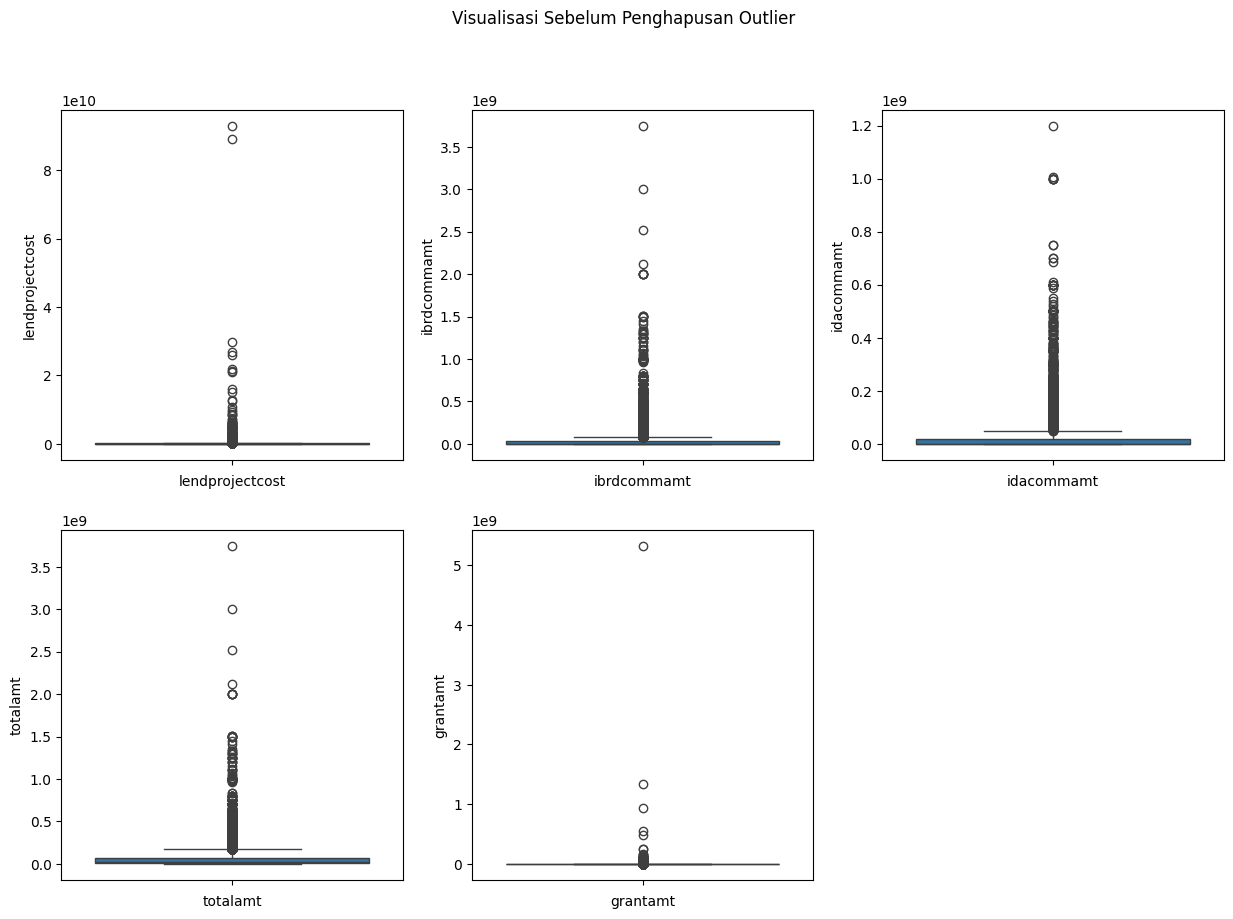

In [369]:
columns_to_visualize = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Visualisasi Sebelum Penghapusan Outlier")

sns.boxplot(ax=axes[0,0], y=df_project_data["lendprojectcost"])
axes[0,0].set_xlabel('lendprojectcost')

sns.boxplot(ax=axes[0,1], y=df_project_data["ibrdcommamt"])
axes[0,1].set_xlabel('ibrdcommamt')

sns.boxplot(ax=axes[0,2], y=df_project_data["idacommamt"])
axes[0,2].set_xlabel('idacommamt')

sns.boxplot(ax=axes[1,0], y=df_project_data["totalamt"])
axes[1,0].set_xlabel('totalamt')

sns.boxplot(ax=axes[1,1], y=df_project_data["grantamt"])
axes[1,1].set_xlabel('grantamt')

axes[1, 2].axis("off")

plt.show()

In [370]:
columns_to_check = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]
df_projects_data_clean_outlier = remove_outlier(df_project_data, columns_to_check)
df_projects_data_clean_outlier = df_projects_data_clean_outlier.reset_index(drop=True)
df_projects_data_clean_outlier

Column ke 1
Q1: 9000000.0
Q3: 98000000.0
IQR: 89000000.0
lower_bound: -124500000.0
upper_bound: 231500000.0

Column ke 2
Q1: 0.0
Q3: 20000000.0
IQR: 20000000.0
lower_bound: -30000000.0
upper_bound: 50000000.0

Column ke 3
Q1: 0.0
Q3: 22000000.0
IQR: 22000000.0
lower_bound: -33000000.0
upper_bound: 55000000.0

Column ke 4
Q1: 0.0
Q3: 25000000.0
IQR: 25000000.0
lower_bound: -37500000.0
upper_bound: 62500000.0

Column ke 5
Q1: 0.0
Q3: 40000.0
IQR: 40000.0
lower_bound: -60000.0
upper_bound: 100000.0



,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,NaN,N,L,Active,...,EET,EET,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Central Government,Central Government ;Other Public Administratio...,Industry;Public Administration; Trade and Serv...,nan,nan,NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,NaN,N,L,Active,...,CPEATI,A U,http://projects.worldbank.org/P165425?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161317?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Oil and Gas,Central Government ;Other Industry; Trade and ...,Industry;Energy and Extractives;Public Adminis...,Regulation and competition policy,Debt management and fiscal sustainability,Corporate Advocacy Priorities;Corporate Advoca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037455/holland-...,Transportation adjustment,nan,Transportation adjustment,Transportation,nan,nan,NaN
9449,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006577/agricult...,Agriculture adjustment,nan,Agriculture adjustment,Fishing and Forestry;Agriculture,nan,nan,NaN
9450,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,Hydro,nan,Hydro,Electric Power & Other Energy,nan,nan,NaN
9451,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,Economic management,nan,Economic management,Multisector,nan,nan,NaN


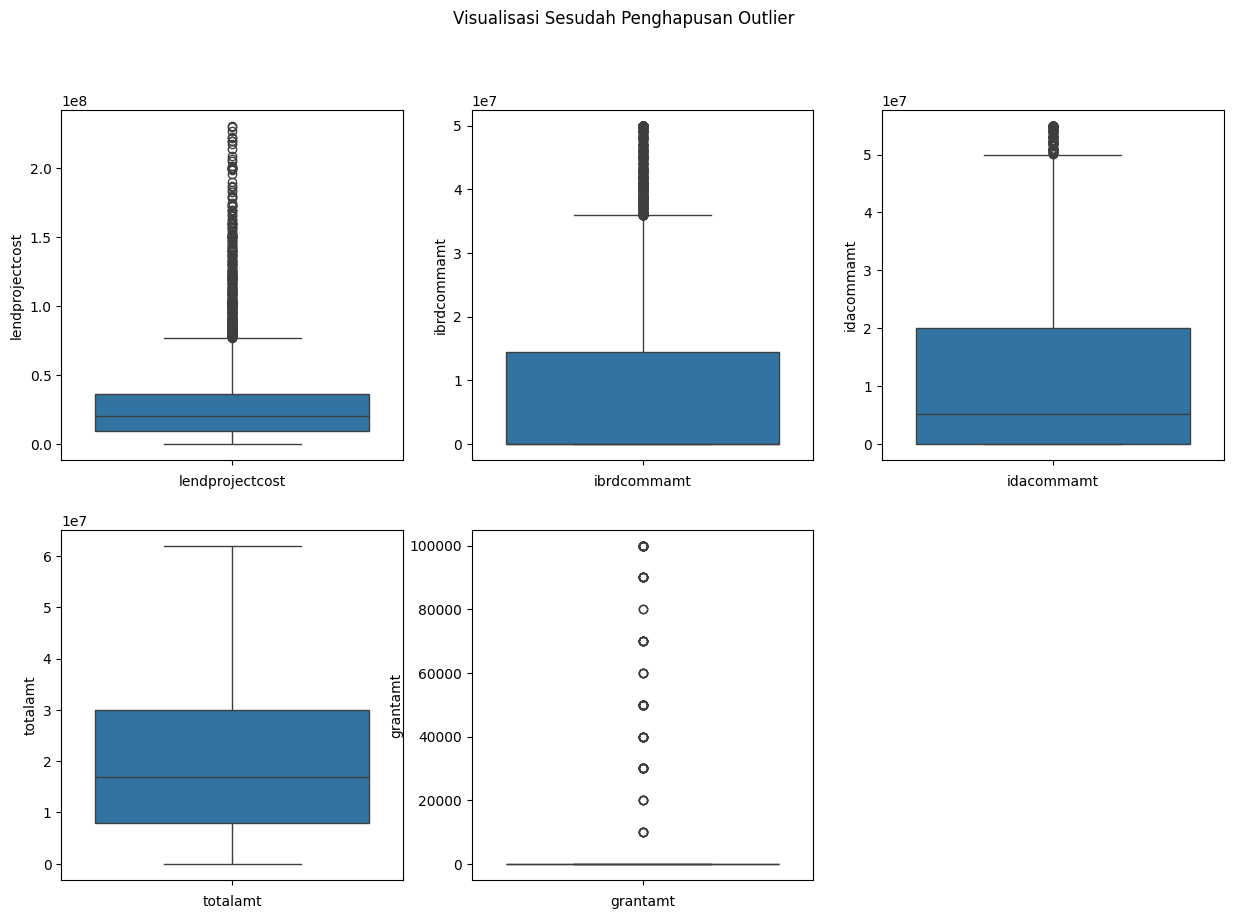

In [371]:
columns_to_visualize = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Visualisasi Sesudah Penghapusan Outlier")

sns.boxplot(ax=axes[0,0], y=df_projects_data_clean_outlier["lendprojectcost"])
axes[0,0].set_xlabel('lendprojectcost')

sns.boxplot(ax=axes[0,1], y=df_projects_data_clean_outlier["ibrdcommamt"])
axes[0,1].set_xlabel('ibrdcommamt')

sns.boxplot(ax=axes[0,2], y=df_projects_data_clean_outlier["idacommamt"])
axes[0,2].set_xlabel('idacommamt')

sns.boxplot(ax=axes[1,0], y=df_projects_data_clean_outlier["totalamt"])
axes[1,0].set_xlabel('totalamt')

sns.boxplot(ax=axes[1,1], y=df_projects_data_clean_outlier["grantamt"])
axes[1,1].set_xlabel('grantamt')

axes[1, 2].axis("off")

plt.show()

In [372]:
df_projects_data_clean_outlier

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,NaN,N,L,Active,...,EET,EET,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Central Government,Central Government ;Other Public Administratio...,Industry;Public Administration; Trade and Serv...,nan,nan,NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,NaN,N,L,Active,...,CPEATI,A U,http://projects.worldbank.org/P165425?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161317?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Oil and Gas,Central Government ;Other Industry; Trade and ...,Industry;Energy and Extractives;Public Adminis...,Regulation and competition policy,Debt management and fiscal sustainability,Corporate Advocacy Priorities;Corporate Advoca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037455/holland-...,Transportation adjustment,nan,Transportation adjustment,Transportation,nan,nan,NaN
9449,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006577/agricult...,Agriculture adjustment,nan,Agriculture adjustment,Fishing and Forestry;Agriculture,nan,nan,NaN
9450,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,Hydro,nan,Hydro,Electric Power & Other Energy,nan,nan,NaN
9451,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,Economic management,nan,Economic management,Multisector,nan,nan,NaN


#### Imputasi Nilai Outlier dengan Nilai Median

In [373]:
def impute_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifikasi data yang masih dianggap outlier
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Imputasi nilai outlier dengan median
        df.loc[outliers, column] = np.median(df[column])
    
    return df

In [374]:
# melakukan imputasi nilai median ke nilai yang terdeteksi sebagai outlier
df_projects_data_imputing_median = impute_outliers_with_median(df_projects_data_clean_outlier, columns_to_check)

# export dataset
df_projects_data_imputing_median.to_csv("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_proccess\project_data_clean.csv", index=False)
df_projects_data_imputing_median

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
1,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,NaN,N,L,Active,...,EET,EET,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Central Government,Central Government ;Other Public Administratio...,Industry;Public Administration; Trade and Serv...,nan,nan,NaN
2,P165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,NaN,N,L,Active,...,CPEATI,A U,http://projects.worldbank.org/P165425?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161317?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Oil and Gas,Central Government ;Other Industry; Trade and ...,Industry;Energy and Extractives;Public Adminis...,Regulation and competition policy,Debt management and fiscal sustainability,Corporate Advocacy Priorities;Corporate Advoca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037455/holland-...,Transportation adjustment,nan,Transportation adjustment,Transportation,nan,nan,NaN
9449,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006577/agricult...,Agriculture adjustment,nan,Agriculture adjustment,Fishing and Forestry;Agriculture,nan,nan,NaN
9450,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,Hydro,nan,Hydro,Electric Power & Other Energy,nan,nan,NaN
9451,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,Economic management,nan,Economic management,Multisector,nan,nan,NaN


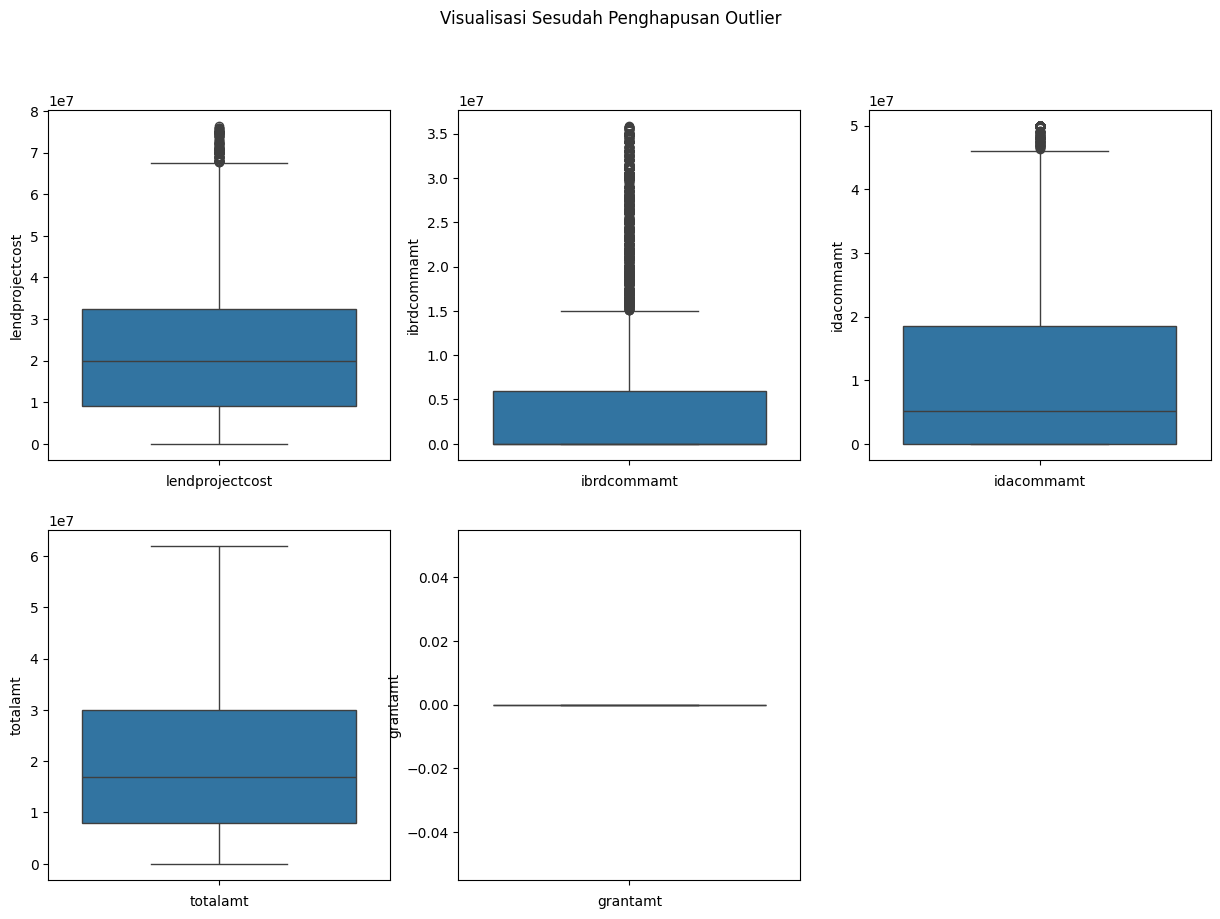

In [375]:
columns_to_visualize = ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Visualisasi Sesudah Penghapusan Outlier")

sns.boxplot(ax=axes[0,0], y=df_projects_data_imputing_median["lendprojectcost"])
axes[0,0].set_xlabel('lendprojectcost')

sns.boxplot(ax=axes[0,1], y=df_projects_data_imputing_median["ibrdcommamt"])
axes[0,1].set_xlabel('ibrdcommamt')

sns.boxplot(ax=axes[0,2], y=df_projects_data_imputing_median["idacommamt"])
axes[0,2].set_xlabel('idacommamt')

sns.boxplot(ax=axes[1,0], y=df_projects_data_imputing_median["totalamt"])
axes[1,0].set_xlabel('totalamt')

sns.boxplot(ax=axes[1,1], y=df_projects_data_imputing_median["grantamt"])
axes[1,1].set_xlabel('grantamt')

axes[1, 2].axis("off")

plt.show()

**Kesimpulan :**  
Setelah melakukan remove outlier dan imputation median untuk data yang masih terdeteksi outlier, ternyata masih terdapat data yang outlier. Hal ini dapat disebabkan oleh besarnya data atau jangkauan nilai yang luas pada kolom-kolom tertentu seperti data dana biaya total proyek dan jumlah komitmen pinjaman di project Bank Dunia.

## Menggabungkan Dataset Population CSV, JSON, XML, DB, API

In [376]:
def find_missing_countries(df1, df2, column1, column2):
    df1_countries = set(df1[column1])
    df2_countries = set(df2[column2])
    missing_countries = df2_countries - df1_countries
    return missing_countries

In [377]:
def remove_duplicate_columns(df):
    # Identifikasi kolom-kolom dengan data yang sama
    duplicated_columns = df.columns[df.T.duplicated()].tolist()

    if duplicated_columns:
        print("Ada kolom dengan data yang persis sama:")
        print(duplicated_columns)
    else:
        print("Tidak ada kolom dengan data yang persis sama.")

    # Transposisi DataFrame
    transposed_df = df.T

    # Identifikasi kolom-kolom duplikat dan pertahankan kolom pertama dari kolom yang sama
    duplicated_columns = transposed_df[transposed_df.duplicated(keep='first')].index

    # Hapus kolom-kolom duplikat
    df = df.drop(columns=duplicated_columns)

    # Menghapus sufiks "_x" dari nama kolom
    df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)

    print("Kolom yang tersisa:")
    print(df.columns.tolist())

    return df

### 1. CSV dan JSON

#### Cek kelengkapan data berdasarkan Country Code

In [378]:
missing_countries = find_missing_countries(df_population_csv, df_population_json, 'Country Code', 'Country Code')
print(missing_countries)

set()


#### Merge Data

In [379]:
merge_df_population_data_csv_json = df_population_csv.merge(
    df_population_json,
    how='inner',
    on=['Country Code']
)
merge_df_population_data_csv_json

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### Hapus Duplikat Data

In [380]:
merge_df_population_data_csv_json = remove_duplicate_columns(merge_df_population_data_csv_json)
merge_df_population_data_csv_json

Ada kolom dengan data yang persis sama:
['Country Name_y', 'Indicator Name_y', 'Indicator Code_y', '1960_y', '1961_y', '1962_y', '1963_y', '1964_y', '1965_y', '1966_y', '1967_y', '1968_y', '1969_y', '1970_y', '1971_y', '1972_y', '1973_y', '1974_y', '1975_y', '1976_y', '1977_y', '1978_y', '1979_y', '1980_y', '1981_y', '1982_y', '1983_y', '1984_y', '1985_y', '1986_y', '1987_y', '1988_y', '1989_y', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y', '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y', '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y']
Kolom yang tersisa:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


### 2. CSV + JSON dan XML

#### Cek kelengkapan data berdasarkan Country Name

In [381]:
missing_countries = find_missing_countries(merge_df_population_data_csv_json, transformed_df_population_xml, 'Country Code', 'Country Code')
print(missing_countries)

set()


#### Merge Data

In [382]:
merge_df_population_data_csv_json_xml = merge_df_population_data_csv_json.merge(
    transformed_df_population_xml,
    how='inner',
    on=['Country Code']
)
merge_df_population_data_csv_json_xml


,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### Hapus Duplikat Data

In [383]:
merge_df_population_data_csv_json_xml = remove_duplicate_columns(merge_df_population_data_csv_json_xml)
merge_df_population_data_csv_json_xml.drop(columns='Country Name_y', inplace=True)
merge_df_population_data_csv_json_xml

Ada kolom dengan data yang persis sama:
['Indicator Name_y', 'Indicator Code_y', '1960_y', '1961_y', '1962_y', '1963_y', '1964_y', '1965_y', '1966_y', '1967_y', '1968_y', '1969_y', '1970_y', '1971_y', '1972_y', '1973_y', '1974_y', '1975_y', '1976_y', '1977_y', '1978_y', '1979_y', '1980_y', '1981_y', '1982_y', '1983_y', '1984_y', '1985_y', '1986_y', '1987_y', '1988_y', '1989_y', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y', '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y', '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y']
Kolom yang tersisa:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


### 3. CSV + JSON + XML dan DB

#### Cek kelengkapan data berdasarkan Country Name

In [384]:
missing_countries = find_missing_countries(merge_df_population_data_csv_json_xml, df_population_db, 'Country Code', 'Country Code')
print(missing_countries)

set()


#### Merge Data

In [385]:
merge_df_population_data_csv_json_xml_db = merge_df_population_data_csv_json_xml.merge(
    df_population_db,
    how='inner',
    on=['Country Code']
)
merge_df_population_data_csv_json_xml_db


,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### Hapus Duplikat Data

In [386]:
merge_df_population_data_csv_json_xml_db = remove_duplicate_columns(merge_df_population_data_csv_json_xml_db)
merge_df_population_data_csv_json_xml_db

Ada kolom dengan data yang persis sama:
['Country Name_y', 'Indicator Name_y', 'Indicator Code_y', '1960_y', '1961_y', '1962_y', '1963_y', '1964_y', '1965_y', '1966_y', '1967_y', '1968_y', '1969_y', '1970_y', '1971_y', '1972_y', '1973_y', '1974_y', '1975_y', '1976_y', '1977_y', '1978_y', '1979_y', '1980_y', '1981_y', '1982_y', '1983_y', '1984_y', '1985_y', '1986_y', '1987_y', '1988_y', '1989_y', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y', '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y', '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', 62]
Kolom yang tersisa:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989'

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [387]:
merge_df_population = merge_df_population_data_csv_json_xml_db
merge_df_population.to_csv("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_proccess\data_population_clean.csv")
merge_df_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
259,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
260,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


### 4. Data Population API

In [388]:
df_data_api.to_csv("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_proccess\data_population_api_clean.csv")
df_data_api

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16438,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16439,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16440,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16441,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


## Engineering Features

### Implementasi AI

#### Integration OpenAI

In [389]:
load_dotenv()

api_key = os.environ["NAGA_AI_API_KEY"]
client = OpenAI(
    api_key=api_key,
    base_url="https://api.naga.ac/v1"
    )

def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role":"user",
                "content":prompt,
            },
        ],
    )
    
    return response.choices[0].message.content

#### Implementasi

In [390]:
prompt ="""Terdapat beberapa dataset yang dapat digunakan :
        1. Data project yang berisi tentang proyek-proyek yang telah atau sedang dilaksanakan oleh Bank Dunia
        2. Data Population yang berisi mengenai populasi negara-negara
        3. Data GDP yang berisi tentang Produk Domestik Bruto (GDP) negara-negara
        4. Data Rural dan Electricity yang berisi tentang persentase populasi pedesaan dan akses listrik diberbagai negara
        Dari dataset yang ada, berikan rekomendasi untuk penerapan feature engineering guna mendapatkan insight baru, seperti yang sudah dilakukan sebelumnya yaitu menghitung GDP perkapita.
    """
result = generate(prompt)
print("Perintah : \n", prompt)
print("output : \n", result)

Perintah : 
 Terdapat beberapa dataset yang dapat digunakan :
        1. Data project yang berisi tentang proyek-proyek yang telah atau sedang dilaksanakan oleh Bank Dunia
        2. Data Population yang berisi mengenai populasi negara-negara
        3. Data GDP yang berisi tentang Produk Domestik Bruto (GDP) negara-negara
        4. Data Rural dan Electricity yang berisi tentang persentase populasi pedesaan dan akses listrik diberbagai negara
        Dari dataset yang ada, berikan rekomendasi untuk penerapan feature engineering guna mendapatkan insight baru, seperti yang sudah dilakukan sebelumnya yaitu menghitung GDP perkapita.
    
output : 
 Salah satu rekomendasi untuk penerapan feature engineering adalah dengan menghitung indeks pembangunan manusia (HDI), yang merupakan indikator yang digunakan untuk mengukur tingkat kesejahteraan manusia di suatu negara. HDI biasanya dihitung berdasarkan tiga indikator utama, yaitu harapan hidup, akses pendidikan, dan standar hidup yang diukur o

### GDP Per Capita

In [391]:
df_gdp_population = pd.merge(transformed_df_gdp, df_data_api, on=['Country Name', 'Country Code', 'Tahun'], suffixes=('_gdp', '_pop'))
df_gdp_population = df_gdp_population.rename(columns={
    'Indicator Name_gdp': 'GDP Indicator Name', 
    'Indicator Code_gdp': 'GDP Indicator Code', 
    'Value_gdp': 'GDP', 
    'Indicator Name_pop': 'Population Indicator Name', 
    'Indicator Code_pop': 'Population Indicator Code', 
    'Value_pop': 'Population'})
df_gdp_population

,Country Name,Country Code,GDP Indicator Name,GDP Indicator Code,Tahun,GDP,Population Indicator Name,Population Indicator Code,Population
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,"Population, total",SP.POP.TOTL,8622466.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,"Population, total",SP.POP.TOTL,8790140.0
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,"Population, total",SP.POP.TOTL,8969047.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,"Population, total",SP.POP.TOTL,9157465.0
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,"Population, total",SP.POP.TOTL,9355514.0
...,...,...,...,...,...,...,...,...,...
13799,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2013,1.545177e+10,"Population, total",SP.POP.TOTL,13555422.0
13800,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2014,1.589105e+10,"Population, total",SP.POP.TOTL,13855753.0
13801,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2015,1.630467e+10,"Population, total",SP.POP.TOTL,14154937.0
13802,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2016,1.661996e+10,"Population, total",SP.POP.TOTL,14452704.0


In [392]:
df_gdp_per_capita = df_gdp_population[["Country Name", "Country Code", "Tahun", "GDP", "Population"]]
df_gdp_per_capita["GDP Per Capita"] = df_gdp_per_capita["GDP"] / df_gdp_per_capita["Population"]
df_gdp_per_capita

C:\Users\ikapu\AppData\Local\Temp\ipykernel_21816\1068030511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_per_capita["GDP Per Capita"] = df_gdp_per_capita["GDP"] / df_gdp_per_capita["Population"]


,Country Name,Country Code,Tahun,GDP,Population,GDP Per Capita
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,62.443703
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,60.950364
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,82.021738
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,85.511073
...,...,...,...,...,...,...
13799,Zimbabwe,ZWE,2013,1.545177e+10,13555422.0,1139.895807
13800,Zimbabwe,ZWE,2014,1.589105e+10,13855753.0,1146.891778
13801,Zimbabwe,ZWE,2015,1.630467e+10,14154937.0,1151.871450
13802,Zimbabwe,ZWE,2016,1.661996e+10,14452704.0,1149.955081


### GDP dan Rural Electricity 

In [393]:
df_gdp_per_capita

,Country Name,Country Code,Tahun,GDP,Population,GDP Per Capita
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,62.443703
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,60.950364
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,82.021738
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,85.511073
...,...,...,...,...,...,...
13799,Zimbabwe,ZWE,2013,1.545177e+10,13555422.0,1139.895807
13800,Zimbabwe,ZWE,2014,1.589105e+10,13855753.0,1146.891778
13801,Zimbabwe,ZWE,2015,1.630467e+10,14154937.0,1151.871450
13802,Zimbabwe,ZWE,2016,1.661996e+10,14452704.0,1149.955081


In [394]:
df_rural_electricity_percent

,Country Name,Country Code,Rural Indicator Name,Rural Indicator Code,Tahun,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.8,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,91.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,91.2,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,90.9,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,90.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
...,...,...,...,...,...,...,...,...,...
15570,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2013,67.3,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.1
15571,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2014,67.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.3
15572,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2015,67.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.7
15573,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,2016,67.7,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.1


In [395]:
# countryname, countrycode, year, gdp, population, gdppercapita, ruralpopulationpercent, electricityaccesspercent, dan projectcost
df_gdp_rural_electricity = pd.merge(df_gdp_per_capita, df_rural_electricity_percent, on=['Country Name', 'Country Code', 'Tahun'], suffixes=('_gdp', '_rural'))
df_gdp_rural_electricity

,Country Name,Country Code,Tahun,GDP,Population,GDP Per Capita,Rural Indicator Name,Rural Indicator Code,Rural Population,Electricity Indicator Name,Electricity Indicator Code,Electricity Access
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375,Rural population (% of total population),SP.RUR.TOTL.ZS,91.8,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,62.443703,Rural population (% of total population),SP.RUR.TOTL.ZS,91.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,60.950364,Rural population (% of total population),SP.RUR.TOTL.ZS,91.2,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,82.021738,Rural population (% of total population),SP.RUR.TOTL.ZS,90.9,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,85.511073,Rural population (% of total population),SP.RUR.TOTL.ZS,90.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13799,Zimbabwe,ZWE,2013,1.545177e+10,13555422.0,1139.895807,Rural population (% of total population),SP.RUR.TOTL.ZS,67.3,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.1
13800,Zimbabwe,ZWE,2014,1.589105e+10,13855753.0,1146.891778,Rural population (% of total population),SP.RUR.TOTL.ZS,67.5,Access to electricity (% of population),EG.ELC.ACCS.ZS,32.3
13801,Zimbabwe,ZWE,2015,1.630467e+10,14154937.0,1151.871450,Rural population (% of total population),SP.RUR.TOTL.ZS,67.6,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.7
13802,Zimbabwe,ZWE,2016,1.661996e+10,14452704.0,1149.955081,Rural population (% of total population),SP.RUR.TOTL.ZS,67.7,Access to electricity (% of population),EG.ELC.ACCS.ZS,38.1


In [396]:
df_gdp_rural_electricity = df_gdp_rural_electricity[["Country Name", "Country Code", "Tahun", "GDP", "Population", "GDP Per Capita", "Rural Population", "Electricity Access"]]
df_gdp_rural_electricity 

,Country Name,Country Code,Tahun,GDP,Population,GDP Per Capita,Rural Population,Electricity Access
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375,91.8,0.0
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,62.443703,91.5,0.0
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,60.950364,91.2,0.0
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,82.021738,90.9,0.0
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,85.511073,90.6,0.0
...,...,...,...,...,...,...,...,...
13799,Zimbabwe,ZWE,2013,1.545177e+10,13555422.0,1139.895807,67.3,37.1
13800,Zimbabwe,ZWE,2014,1.589105e+10,13855753.0,1146.891778,67.5,32.3
13801,Zimbabwe,ZWE,2015,1.630467e+10,14154937.0,1151.871450,67.6,33.7
13802,Zimbabwe,ZWE,2016,1.661996e+10,14452704.0,1149.955081,67.7,38.1


### Project Data dan GDP

In [397]:
df_project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P162228?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P163962?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,http://projects.worldbank.org/P167672?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,http://projects.worldbank.org/P161364?lang=en,Social Protection,Other Industry; Trade and Services,Other Agriculture;Other Industry; Trade and Se...,Agriculture;Public Administration;Industry; Tr...,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P006578/power-ir...,Hydro,nan,Hydro,Electric Power & Other Energy,nan,nan,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037451/steel-mi...,Economic management,nan,Economic management,Multisector,nan,nan,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037362/post-war...,Economic management,nan,Economic management,Multisector,nan,nan,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P037452/post-war...,Economic management,nan,Economic management,Multisector,nan,nan,NaN


Overview Data Project Data

In [398]:
# Country Name unique
unique_country_names_gdp = df_gdp_rural_electricity['Country Name'].unique()

# regex dari country name gdp
regex_pattern = '|'.join(map(re.escape, unique_country_names_gdp))

nama_negara_mapping = {}
for country_name_project_data in df_project_data['countryname'].unique():
    match = re.search(regex_pattern, country_name_project_data)
    if match:
        nama_negara_mapping[country_name_project_data] = match.group()

# replace value
df_project_data['countryname'] = df_project_data['countryname'].replace(nama_negara_mapping)

df_project_data = df_project_data.sort_values(by='countryname', ascending=True)
df_project_data = df_project_data.reset_index(drop=True)
df_project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,borrower,impagency,url,sector1,sector2,sector,mjsector,theme1,theme2,goal
0,P112872,South Asia,Afghanistan,PE,Investment Project Financing,IN,B,N,L,Active,...,ISLAIC E,AHAISTA,http://projects.worldbank.org/P112872/second-c...,Other Transportation,Public Administration - Industry; Trade and Se...,ICT Services;Public Administration - Industry;...,Industry;Information and Communications Techno...,Regional integration,Trade facilitation and market access,Global Public Goods Priorities|Millennium Deve...
1,P106259,South Asia,Afghanistan,PE,Investment Project Financing,IN,B,N,L,Closed,...,ISLAIC E,IIST,http://projects.worldbank.org/P106259/second-e...,Tertiary Education,Primary Education,Central Government ;Secondary Education;Sub-Na...,Education;Public Administration,Education for all,Gender,Corporate Advocacy Priorities|Millennium Devel...
2,P164762,South Asia,Afghanistan,PE,Investment Project Financing,IN,B,N,L,Pipeline,...,NaN,NaN,http://projects.worldbank.org/P164762?lang=en,nan,nan,NaN,NaN,nan,nan,NaN
3,P098358,South Asia,Afghanistan,PE,Emergency Recovery Loan,IN,B,Y,L,Closed,...,EET,IIST,http://projects.worldbank.org/P098358/afghanis...,Health,Central Government,Central Government ;Health,Health;Public Administration,Population and reproductive health,Health system performance,Corporate Advocacy Priorities|Millennium Devel...
4,P089040,South Asia,Afghanistan,PE,Emergency Recovery Loan,IN,C,N,L,Closed,...,ISLAIC E,IIST,http://projects.worldbank.org/P089040/strength...,Tertiary Education,Central Government,Central Government ;Tertiary Education,Education;Public Administration,Administrative and civil service reform,Education for the knowledge economy,Corporate Advocacy Priorities;Corporate Advoca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P003333,Africa,Zimbabwe,PE,Specific Investment Loan,IN,C,N,L,Closed,...,NaN,NaN,http://projects.worldbank.org/P003333/sexually...,Health,nan,Health,Health,HIV/AIDS,nan,Global Public Goods Priorities|Corporate Advoc...
18244,P116209,Africa,Zimbabwe,RE,Specific Investment Loan,IN,C,N,L,Closed,...,EET,NaN,http://projects.worldbank.org/P116209/zimbabwe...,Social Protection,nan,Social Protection,Social Protection,Conflict prevention and post-conflict reconstr...,nan,Corporate Advocacy Priorities;Corporate Advoca...
18245,P155751,Africa,Zimbabwe,RE,Investment Project Financing,IN,NaN,N,L,Active,...,T,T,http://projects.worldbank.org/P155751?lang=en,Other Public Administration,nan,Other Public Administration,Public Administration,Public expenditure; financial management and p...,nan,Global Public Goods Priorities|Corporate Advoc...
18246,P003313,Africa,Zimbabwe,PE,Structural Adjustment Loan,AD,U,N,L,Closed,...,EET,I I,http://projects.worldbank.org/P003313/structur...,Central Government,Other Industry; Trade and Services,Central Government ;Trade;Other Industry;Other...,Industry;Public Administration;Information and...,Regulation and competition policy,Debt management and fiscal sustainability,Corporate Advocacy Priorities;Corporate Advoca...


In [399]:
# Menambahkan kolom tahun ke dalam DataFrame
df_project_data['tahun'] = df_project_data['boardapprovaldate'].dt.year

df_project_data_overview = df_project_data[["countryname", "status", "project_name", "tahun", "lendprojectcost"]]

df_project_data_overview = df_project_data_overview.rename(columns={
    "countryname": "Country Name",
    "status": "Status",
    "project_name": "Project Name",
    "tahun": "Tahun",
    "lendprojectcost": "Project Cost"
})
# Menampilkan DataFrame baru
df_project_data_overview


,Country Name,Status,Project Name,Tahun,Project Cost
0,Afghanistan,Active,Second Customs Reform and Trade Facilitation P...,2010.0,50480000.0
1,Afghanistan,Closed,Afghanistan - Second Education Quality Improve...,2008.0,186700000.0
2,Afghanistan,Pipeline,Afghanistan Land Administration System Project,NaN,30000000.0
3,Afghanistan,Closed,Afghanistan Health (supplement),2006.0,30000000.0
4,Afghanistan,Closed,Afghanistan: Strengthening Higher Education Pr...,2005.0,40000000.0
...,...,...,...,...,...
18243,Zimbabwe,Closed,Sexually Transmitted Infections (STI) Preventi...,1993.0,64500000.0
18244,Zimbabwe,Closed,Zimbabwe Agricultural Input Project,2009.0,4900000.0
18245,Zimbabwe,Active,Public Procurement Modernisation Technical As...,2015.0,2000000.0
18246,Zimbabwe,Closed,Structural Adjustment Credit Project,1992.0,390000000.0


In [400]:
# Group by Country Name
df_project_data_grouped = df_project_data_overview.groupby('Country Name')['Project Cost'].sum().reset_index()
df_project_data_grouped

,Country Name,Project Cost
0,Afghanistan,1.093454e+10
1,Africa,1.354880e+10
2,Albania,3.869890e+09
3,Algeria,8.483590e+09
4,American Samoa,2.000000e+05
...,...,...
198,Western Africa,9.441430e+09
199,Western Balkans,1.791700e+08
200,World,8.951459e+10
201,Zambia,7.468180e+09


Merge Project Data dengan GDP Rural Electricity

In [401]:
df_country_sosio_economic= pd.merge(df_gdp_rural_electricity, df_project_data_grouped, on='Country Name')
df_country_sosio_economic

,Country Name,Country Code,Tahun,GDP,Population,GDP Per Capita,Rural Population,Electricity Access,Project Cost
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375,91.8,0.0,1.093454e+10
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,62.443703,91.5,0.0,1.093454e+10
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,60.950364,91.2,0.0,1.093454e+10
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,82.021738,90.9,0.0,1.093454e+10
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,85.511073,90.6,0.0,1.093454e+10
...,...,...,...,...,...,...,...,...,...
8637,Zimbabwe,ZWE,2013,1.545177e+10,13555422.0,1139.895807,67.3,37.1,4.485600e+09
8638,Zimbabwe,ZWE,2014,1.589105e+10,13855753.0,1146.891778,67.5,32.3,4.485600e+09
8639,Zimbabwe,ZWE,2015,1.630467e+10,14154937.0,1151.871450,67.6,33.7,4.485600e+09
8640,Zimbabwe,ZWE,2016,1.661996e+10,14452704.0,1149.955081,67.7,38.1,4.485600e+09


## Scaling Features

In [402]:
def min_max_scaling(data, columns):
    scaler = MinMaxScaler()
    scaled_columns = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(scaled_columns, columns=[f'{col}_scaled' for col in columns])
    return pd.concat([data, scaled_df], axis=1)

### 1. Project Data CSV

In [403]:
scaled_df_project_data = min_max_scaling(df_projects_data_imputing_median, columns_to_check)
columns_to_visualize = ["id", "countryname", "project_name", "lendprojectcost_scaled", "ibrdcommamt_scaled", "idacommamt_scaled", "totalamt_scaled", "grantamt_scaled"]

# Tampilkan DataFrame dengan kolom yang ditentukan
df_visualized = scaled_df_project_data[columns_to_visualize]
df_visualized

,id,countryname,project_name,lendprojectcost_scaled,ibrdcommamt_scaled,idacommamt_scaled,totalamt_scaled,grantamt_scaled
0,P158768,Islamic Republic of Afghanistan,Public-Private Partnerships and Public Investm...,0.653595,0.000000,0.4,0.322581,0.0
1,P164289,Grenada,Grenada First Fiscal Resilience and Blue Growt...,0.457516,0.000000,0.6,0.483871,0.0
2,P165425,Co-operative Republic of Guyana,First Programmatic Financial and Fiscal Stabil...,0.326797,0.000000,0.7,0.564516,0.0
3,P161317,Republic of Kenya,Kenya Industry and Entrepreneurship,0.653595,0.000000,1.0,0.806452,0.0
4,P167330,Kingdom of Tonga,Tonga Second Inclusive Growth Development Poli...,0.130719,0.000000,0.2,0.161290,0.0
...,...,...,...,...,...,...,...,...
9448,P037455,Kingdom of the Netherlands,Holland America Lijn Project,0.026144,0.055710,0.0,0.032258,0.0
9449,P006577,Republic of Chile,Agricultural Machinery Project,0.032680,0.069638,0.0,0.040323,0.0
9450,P006578,Republic of Chile,Power and Irrigation Project,0.176471,0.376045,0.0,0.217742,0.0
9451,P037451,Grand Duchy of Luxembourg,Steel Mill and Railway Project,0.156863,0.334262,0.0,0.193548,0.0


### 2. Data GDP

In [404]:
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
259,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,1.701070e+10
260,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
261,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [405]:
column_to_scale = df_gdp.columns[4:]

scaled_df_gdp = min_max_scaling(df_gdp, column_to_scale)
column_to_scale_scaled = [f"{col}_scaled" for col in column_to_scale]
columns_to_visualize = ["Country Name"] + column_to_scale_scaled

df_visualized = scaled_df_gdp[columns_to_visualize]
df_visualized

,Country Name,1960_scaled,1961_scaled,1962_scaled,1963_scaled,1964_scaled,1965_scaled,1966_scaled,1967_scaled,1968_scaled,...,2008_scaled,2009_scaled,2010_scaled,2011_scaled,2012_scaled,2013_scaled,2014_scaled,2015_scaled,2016_scaled,2017_scaled
0,Aruba,0.000258,0.000258,0.000258,0.000258,0.000258,0.000268,0.000267,0.000293,0.000293,...,0.000044,0.000041,0.000037,0.000035,0.000027,0.000026,0.000025,0.000027,0.000026,0.000025
1,Afghanistan,0.000067,0.000068,0.000068,0.000094,0.000100,0.000131,0.000183,0.000240,0.000197,...,0.000160,0.000207,0.000241,0.000244,0.000273,0.000263,0.000260,0.000256,0.000256,0.000257
2,Angola,0.004900,0.004900,0.004900,0.004900,0.004900,0.005087,0.005087,0.005575,0.005575,...,0.001327,0.001255,0.001251,0.001420,0.001519,0.001621,0.001601,0.001371,0.001255,0.001539
3,Albania,0.000791,0.000791,0.000791,0.000791,0.000791,0.000821,0.000821,0.000899,0.000899,...,0.000203,0.000200,0.000180,0.000175,0.000164,0.000165,0.000167,0.000152,0.000156,0.000161
4,Andorra,0.000190,0.000190,0.000190,0.000190,0.000190,0.000197,0.000197,0.000215,0.000215,...,0.000063,0.000060,0.000050,0.000046,0.000042,0.000042,0.000042,0.000037,0.000037,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,0.000648,0.000648,0.000649,0.000649,0.000648,0.000673,0.000673,0.000737,0.000737,...,0.000089,0.000094,0.000088,0.000091,0.000086,0.000091,0.000093,0.000086,0.000088,0.000088
259,"Yemen, Rep.",0.002165,0.002165,0.002166,0.002165,0.002165,0.002248,0.002248,0.002463,0.002464,...,0.000424,0.000417,0.000468,0.000446,0.000472,0.000524,0.000546,0.000462,0.000239,0.000210
260,South Africa,0.000963,0.001014,0.001081,0.001199,0.001320,0.001497,0.001632,0.001995,0.002157,...,0.004526,0.004942,0.005690,0.005687,0.005286,0.004760,0.004434,0.004245,0.003894,0.004330
261,Zambia,0.000089,0.000087,0.000087,0.000090,0.000105,0.000141,0.000165,0.000196,0.000231,...,0.000282,0.000254,0.000307,0.000320,0.000340,0.000364,0.000343,0.000282,0.000275,0.000319


### 3. Data Population API

In [406]:
df_data_api

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0
...,...,...,...,...,...,...
16438,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0
16439,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0
16440,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0
16441,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0


In [407]:
scaled_data = min_max_scaling(df_data_api, ['Value'])
scaled_data

,Country Name,Country Code,Indicator Name,Indicator Code,Tahun,Value,Value_scaled
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0,0.001084
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,8790140.0,0.001106
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,8969047.0,0.001128
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9157465.0,0.001152
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9355514.0,0.001177
...,...,...,...,...,...,...,...
16438,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2018,15052184.0,0.001893
16439,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2019,15354608.0,0.001931
16440,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2020,15669666.0,0.001971
16441,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021,15993524.0,0.002012


# Load Data

## Export CSV

In [408]:
df_country_sosio_economic.to_csv("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_clean\country_sosio_economic.csv", index=False)

## Load Google Storage

In [409]:
load_dotenv()

storage_bucket = os.getenv("GOOGLE_STORAGE_BUCKET")
credentials_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")

with open(credentials_path) as f:
    service_account_info = json.load(f)

credentials_info = google.oauth2.service_account.Credentials.from_service_account_info(
    service_account_info
)

storage_client = google.cloud.storage.Client(credentials=credentials_info)

bucket = storage_client.get_bucket(storage_bucket)

datetime_now = datetime.now().strftime("%d%m%Y-%H-%M-%S")

blob = bucket.blob(f"data-{datetime_now}/country_sosio_economic.csv")
blob.upload_from_filename("D:\Alterra Academy\mini-project\mini-project_ika-purwanti\data_clean\country_sosio_economic.csv")

print("File Uploaded to Bucket")


File Uploaded to Bucket


# Visualisasi Data

## Data Project 

### Analisis Deskriptif

In [410]:
df_project_data_overview["Project Cost"].describe()

count    1.812300e+04
mean     1.348273e+08
std      1.134161e+09
min      0.000000e+00
25%      9.000000e+06
50%      3.000000e+07
75%      9.800000e+07
max      9.300700e+10
Name: Project Cost, dtype: float64

In [411]:
# analisis berdasarkan country name
cost_by_country = df_project_data_overview.groupby('Country Name')['Project Cost'].describe()
cost_by_country

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
Afghanistan,171.0,6.394468e+07,1.340912e+08,150000.0,11200000.0,30000000.0,59800000.0,1.329000e+09
Africa,264.0,5.132121e+07,1.173384e+08,0.0,1980000.0,12655000.0,50000000.0,1.262500e+09
Albania,123.0,3.146252e+07,4.262065e+07,100000.0,6430000.0,17000000.0,40000000.0,2.445000e+08
Algeria,85.0,9.980694e+07,1.116122e+08,0.0,20500000.0,70000000.0,123600000.0,5.852000e+08
American Samoa,1.0,2.000000e+05,NaN,200000.0,200000.0,200000.0,200000.0,2.000000e+05
...,...,...,...,...,...,...,...,...
Western Africa,74.0,1.275869e+08,1.601474e+08,270000.0,20992500.0,78250000.0,155000000.0,7.850400e+08
Western Balkans,8.0,2.239625e+07,2.879167e+07,2500000.0,4360000.0,14880000.0,22702500.0,9.000000e+07
World,102.0,8.775940e+08,8.821822e+09,0.0,240000.0,495000.0,1000000.0,8.910000e+10


### Analisis Korelasi

In [412]:
df_project_data['boardapprovaldate'] = pd.to_datetime(df_project_data['boardapprovaldate'])
df_project_data['closingdate'] = pd.to_datetime(df_project_data['closingdate'])

# Hitung durasi proyek (dalam bulan)
df_project_data['Durasi Proyek (bulan)'] = (df_project_data['closingdate'] - df_project_data['boardapprovaldate']).dt.days / 30

korelasi_biaya_dan_durasi = df_project_data['lendprojectcost'].corr(df_project_data['Durasi Proyek (bulan)'])

print("Koefisien Korelasi antara Biaya Proyek dan Durasi Proyek:", korelasi_biaya_dan_durasi)

Koefisien Korelasi antara Biaya Proyek dan Durasi Proyek: 0.002312260431895427


**Kesimpulan :**  
Koefisien korelasi antara biaya proyek dan durasi proyek sebesar 0.0023, ini berarti menunjukkan bahwa hubungan antara biaya proyek dan durasi proyek sangat lemah.

### Analisis Distribusi

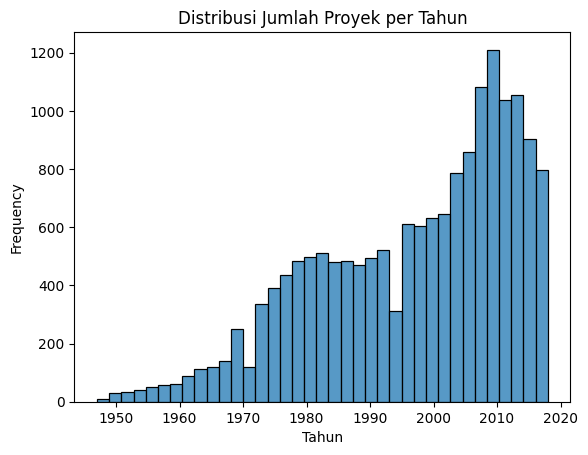

In [413]:
sns.histplot(df_project_data_overview['Tahun'])

plt.xlabel('Tahun')
plt.ylabel('Frequency')
plt.title('Distribusi Jumlah Proyek per Tahun')

# Show the plot
plt.show()

**Kesimpulan :**  
Dalam konteks distribusi jumlah proyek per tahun, diagram batang menunjukan relatif kenaikan pada tahun tahun setelahnya, ini berarti jumlah proyek yang disetujui meningkat dari satu tahun ke tahun berikutnya, walaupun ada penurunan yang terjadi di tahun tahun tertentu.

### Kontribusi Negara terhadap Jumlah Proyek Bank Dunia

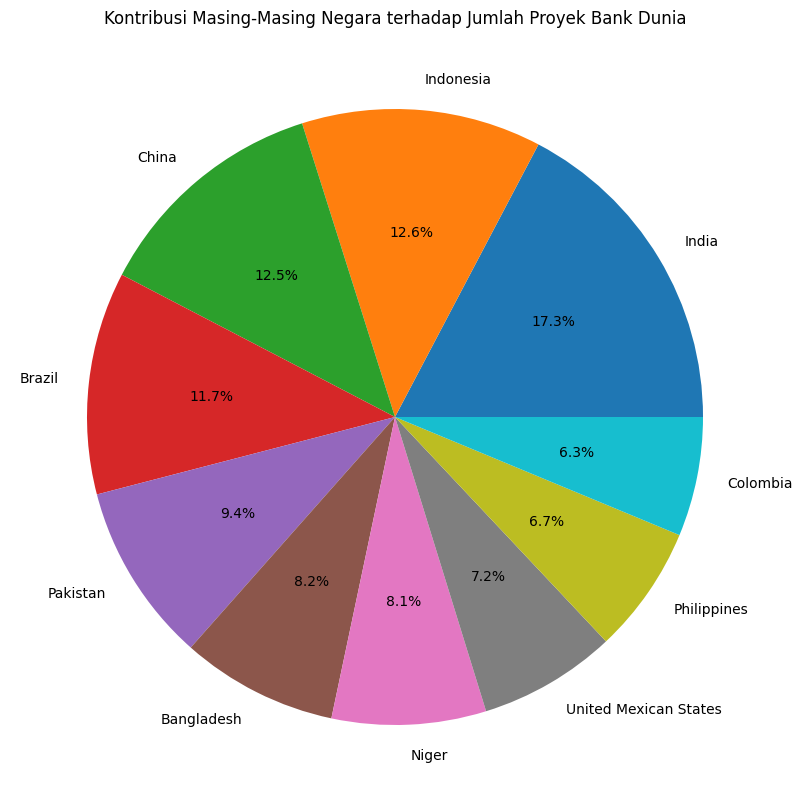

In [424]:
# Hitung jumlah proyek per negara
jumlah_proyek_per_negara = df_project_data_overview['Country Name'].value_counts()

# top 10 negara dgn jumlah project terbanyak
top_10_negara = jumlah_proyek_per_negara.head(10)

plt.figure(figsize=(10, 10))
top_10_negara.plot(kind='pie', autopct='%1.1f%%')
plt.title('Kontribusi Masing-Masing Negara terhadap Jumlah Proyek Bank Dunia')
plt.ylabel('')
plt.show()

### Jumlah Proyek Berdasarkan Status

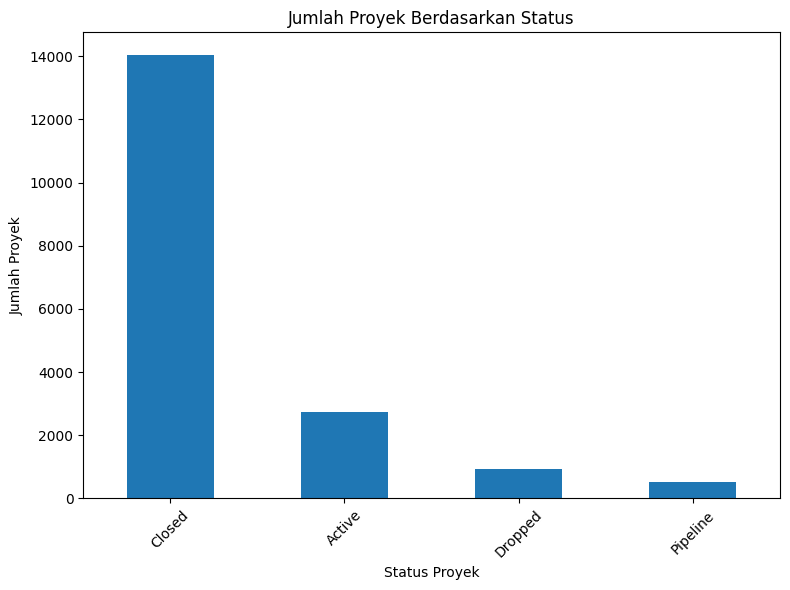

In [415]:
# Hitung jumlah proyek per status
status_counts  = df_project_data['status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.title('Jumlah Proyek Berdasarkan Status')
plt.xlabel('Status Proyek')
plt.ylabel('Jumlah Proyek')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Distribusi Proyek berdasarkan Kategori Proyek

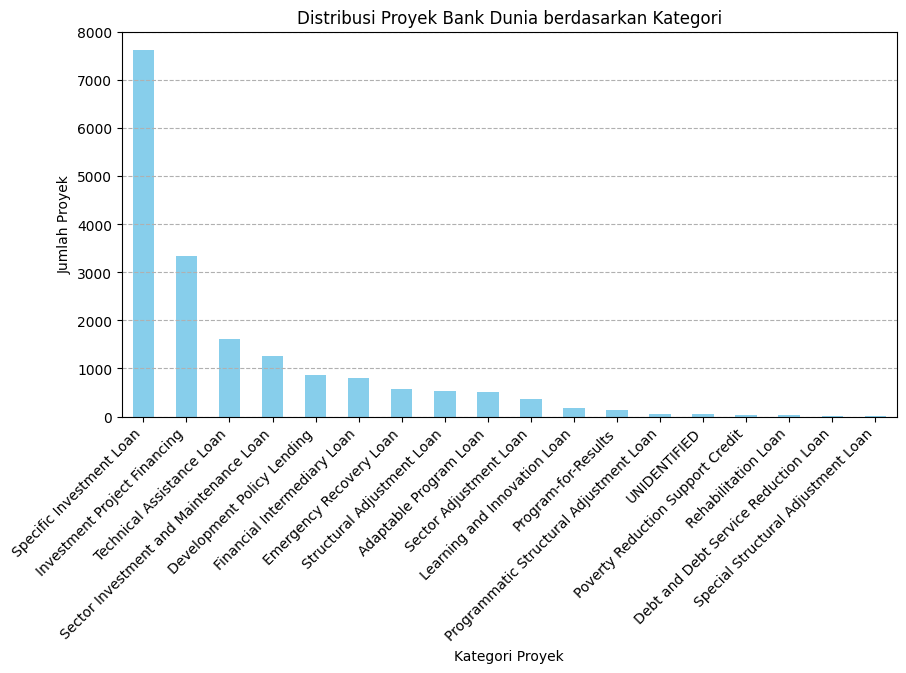

In [416]:
# Hitung jumlah proyek per kategori
sum_category_proyek = df_project_data['lendinginstr'].value_counts()

# Visualisasikan distribusi proyek berdasarkan kategori menggunakan bar chart
plt.figure(figsize=(10, 5))
sum_category_proyek.plot(kind='bar', color='skyblue')
plt.title('Distribusi Proyek Bank Dunia berdasarkan Kategori')
plt.xlabel('Kategori Proyek')
plt.ylabel('Jumlah Proyek')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

### Jumlah Proyek yang disetujui per Tahun

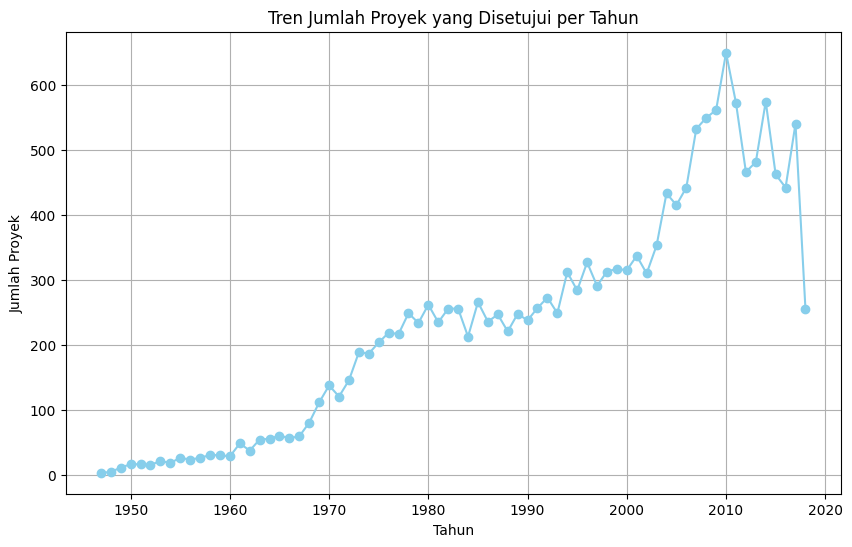

In [417]:
# ekstrak tahun dari tanggal persetujuan
df_project_data['Tahun'] = df_project_data['boardapprovaldate'].dt.year

# Hitung jumlah proyek yang disetujui setiap tahun
jumlah_proyek_per_tahun = df_project_data.groupby('Tahun').size()

plt.figure(figsize=(10, 6))
jumlah_proyek_per_tahun.plot(kind='line', marker='o', color='skyblue')
plt.title('Tren Jumlah Proyek yang Disetujui per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Proyek')
plt.grid(True)

plt.show()

## Data Population

### Analisis Deskriptif Populasi untuk setiap tahunnya

In [418]:
# Menghitung statistik deskriptif populasi di seluruh dunia setiap tahun
deskripsi_populasi_dunia = df_data_api.groupby('Tahun')['Value'].describe()

print("Statistik Deskriptif Populasi di Seluruh Dunia Setiap Tahun:")
deskripsi_populasi_dunia

Statistik Deskriptif Populasi di Seluruh Dunia Setiap Tahun:


,count,mean,std,min,25%,50%,75%,max
Tahun,,,,,,,,
1960,261.0,1.070505e+08,3.598417e+08,0.0,480579.0,3645600.0,21720697.0,3.031474e+09
1961,261.0,1.085229e+08,3.642829e+08,0.0,491140.0,3708193.0,22203109.0,3.072422e+09
1962,261.0,1.105109e+08,3.708413e+08,0.0,502558.0,3799155.0,22699703.0,3.126850e+09
1963,261.0,1.129701e+08,3.793344e+08,0.0,513409.0,3893628.0,23259094.0,3.193429e+09
1964,261.0,1.154503e+08,3.878696e+08,0.0,521753.0,3990361.0,23948624.0,3.260442e+09
...,...,...,...,...,...,...,...,...
2018,261.0,2.875221e+08,9.533778e+08,10865.0,1504709.0,10175214.0,52666014.0,7.660371e+09
2019,261.0,2.909696e+08,9.637459e+08,10956.0,1553031.0,10278887.0,53040212.0,7.741775e+09
2020,261.0,2.943116e+08,9.736567e+08,11069.0,1596049.0,10297081.0,53423198.0,7.820206e+09


In [419]:
df_populasi_indonesia = df_data_api[df_data_api['Country Name'] == 'Indonesia']

# Menghitung statistik deskriptif populasi Indonesia setiap tahun
deskripsi_populasi_indonesia = df_populasi_indonesia.groupby('Tahun')['Value'].describe()

print("Statistik Deskriptif Populasi di Indonesia Setiap Tahun:")
deskripsi_populasi_indonesia

Statistik Deskriptif Populasi di Indonesia Setiap Tahun:


,count,mean,std,min,25%,50%,75%,max
Tahun,,,,,,,,
1960,1.0,88382881.0,NaN,88382881.0,88382881.0,88382881.0,88382881.0,88382881.0
1961,1.0,90816938.0,NaN,90816938.0,90816938.0,90816938.0,90816938.0,90816938.0
1962,1.0,93345489.0,NaN,93345489.0,93345489.0,93345489.0,93345489.0,93345489.0
1963,1.0,95962527.0,NaN,95962527.0,95962527.0,95962527.0,95962527.0,95962527.0
1964,1.0,98675061.0,NaN,98675061.0,98675061.0,98675061.0,98675061.0,98675061.0
...,...,...,...,...,...,...,...,...
2018,1.0,267066843.0,NaN,267066843.0,267066843.0,267066843.0,267066843.0,267066843.0
2019,1.0,269582878.0,NaN,269582878.0,269582878.0,269582878.0,269582878.0,269582878.0
2020,1.0,271857970.0,NaN,271857970.0,271857970.0,271857970.0,271857970.0,271857970.0


### Analisis Pertumbuhan Populasi

In [420]:
df_population = df_data_api.copy()

# Menghitung tingkat pertumbuhan populasi tahunan
df_population['Tingkat Pertumbuhan'] = (df_population.groupby('Country Name')['Value'].pct_change() * 100).round(2)

df_population = df_population[["Country Name", "Tahun", "Value", "Tingkat Pertumbuhan"]]
df_population

,Country Name,Tahun,Value,Tingkat Pertumbuhan
0,Afghanistan,1960,8622466.0,NaN
1,Afghanistan,1961,8790140.0,1.94
2,Afghanistan,1962,8969047.0,2.04
3,Afghanistan,1963,9157465.0,2.10
4,Afghanistan,1964,9355514.0,2.16
...,...,...,...,...
16438,Zimbabwe,2018,15052184.0,2.04
16439,Zimbabwe,2019,15354608.0,2.01
16440,Zimbabwe,2020,15669666.0,2.05
16441,Zimbabwe,2021,15993524.0,2.07


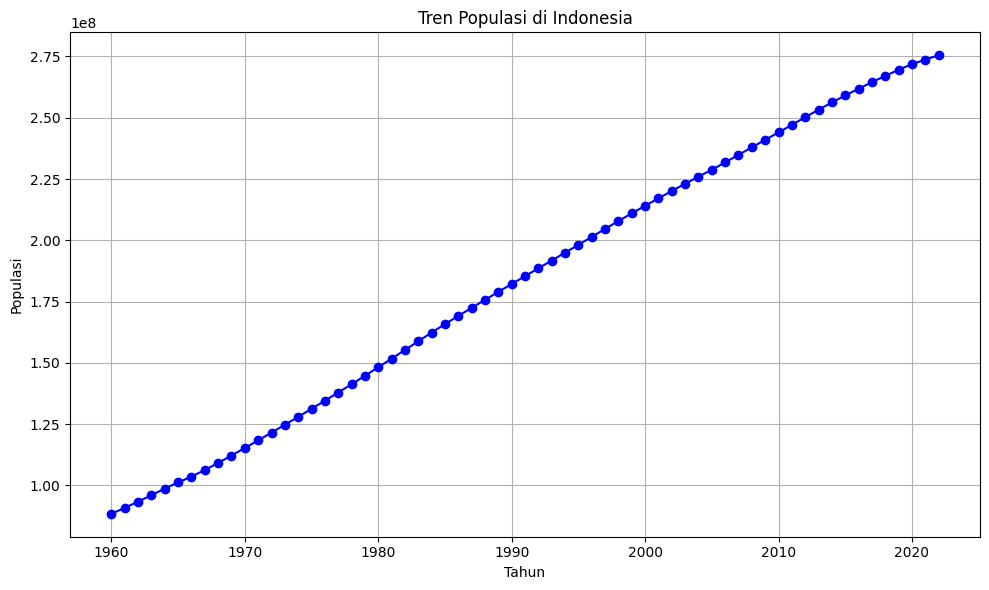

In [421]:
# Memfilter data untuk hanya mencakup populasi Indonesia
data_indonesia = df_population[df_population['Country Name'] == 'Indonesia']

# Membuat visualisasi menggunakan Line Chart
plt.figure(figsize=(10, 6))
plt.plot(data_indonesia['Tahun'], data_indonesia['Value'], marker='o', color='b', linestyle='-')
plt.title('Tren Populasi di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Populasi')
plt.grid(True)
plt.tight_layout()
plt.show()

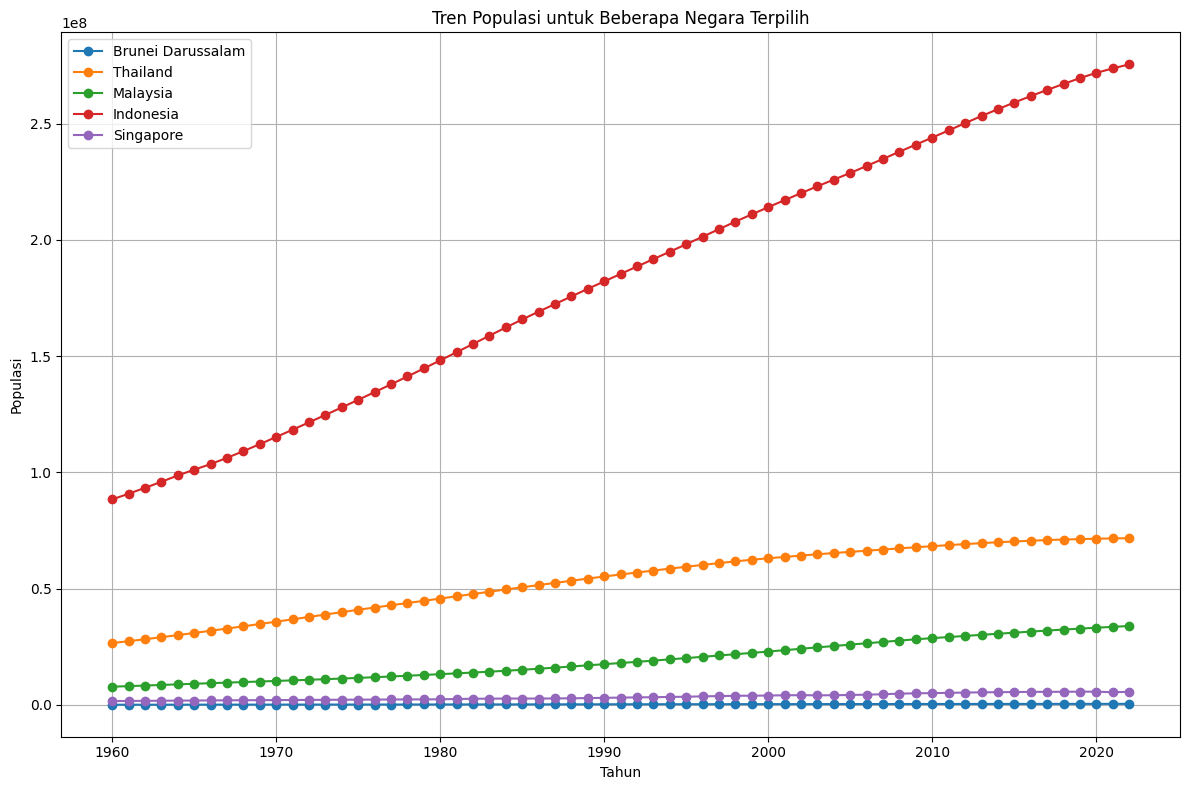

In [422]:
negara_pilihan = ['Brunei Darussalam', 'Thailand', 'Malaysia', 'Indonesia', 'Singapore']

# Memfilter data 
data_pilihan = df_population[df_population['Country Name'].isin(negara_pilihan)]

plt.figure(figsize=(12, 8))
for negara in negara_pilihan:
    data_negara = data_pilihan[data_pilihan['Country Name'] == negara]
    plt.plot(data_negara['Tahun'], data_negara['Value'], marker='o', label=negara)

plt.title('Tren Populasi untuk Beberapa Negara Terpilih')
plt.xlabel('Tahun')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Data GDP dan Rural Elektricity

### Tren pertumbuhan GDP untuk beberapa negara

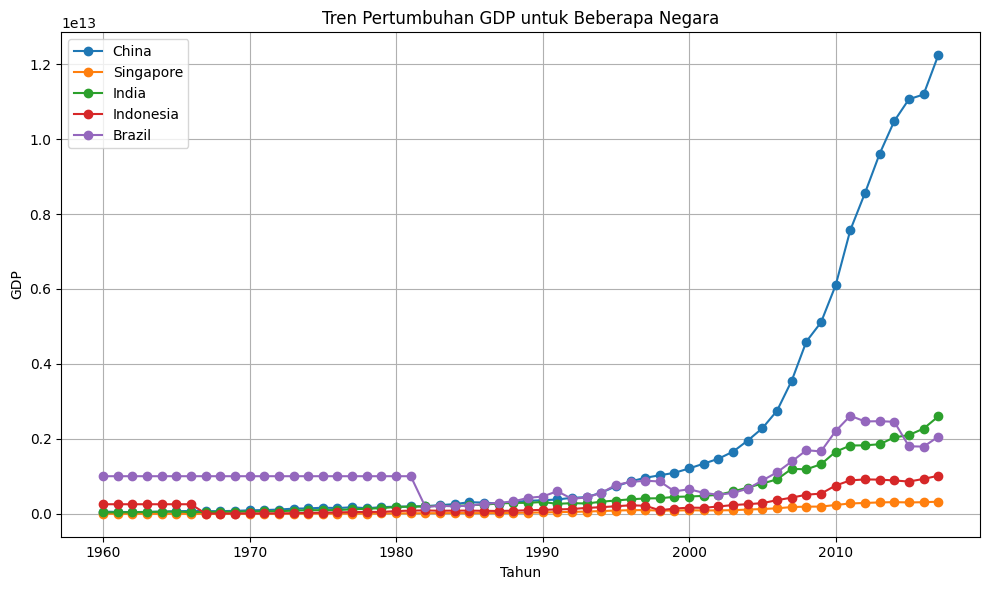

In [423]:
negara_pilihan = ['China', 'Singapore', 'India', 'Indonesia', 'Brazil']
data_negara_pilihan = df_gdp_rural_electricity[df_gdp_rural_electricity['Country Name'].isin(negara_pilihan)]

plt.figure(figsize=(10, 6))
for negara in negara_pilihan:
    data_negara = data_negara_pilihan[data_negara_pilihan['Country Name'] == negara]
    plt.plot(data_negara['Tahun'], data_negara['GDP'], marker='o', label=negara)

plt.title('Tren Pertumbuhan GDP untuk Beberapa Negara')
plt.xlabel('Tahun')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()